# Miscentering distribution ammassi eRosita
La missione astronomica survey eRosita si propone di mappare il cielo nell'energia dei raggi X. Nel febbraio 2024 è stato pubblicato per la prima volta il catolo della missione con tutti i dati raccolti fino a quel momento.
Tra questi ci sono informazioni di grande importanza astrofisica come il redshift (BEST_Z), la massa (LogM500, espressa in log di masse solari) e la distanza normalizzata tra il centro osservato in banda X e quello in banda ottica (BCG_offset_R500).

Ci sono vari modi per definire il centro di un ammasso di galssie: si possono usare effetti di lensing gravitazionale, o anche raggi X prodotti dai gas, oppure rilevando dati ottici e ad infrarosso, considerando come posizione del centro della galassia, per esempio, il *"brightest cluster galaxy (BCG)"*.
La calibrazione del miscentring distribution, ovvero delle differenze tra i centri in banda X e in banda ottica, è essenziale per aumentare la precisione di altre misure cosmologice sugli ammassi di galassie, come la loro massa, distribuzinone ed evoluzione temporale.

L'obbiettivo di questa relazione è analizzare la miscentering distribution, valutandone la dipendenza dalla massa e dal redshift, andando anche a descriverne quantitivamente la compatibilità con due possibili modelli teorici: $S15$ e $Z19$.

---
[Offset between X-ray and optical centers in clusters of galaxies: Connecting eROSITA data with simulations](https://doi.org/10.1051/0004-6361/202245138)

# Analisi del catalogo
La prima cosa fatta per iniziare l'analisi con *python* è stata l'importazione del catalogo dati insieme ad alcune librerie standard.

In [1]:
%config InlineBackend.figure_format = "retina"

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pygtc
from matplotlib import rcParams

rcParams["savefig.dpi"] = 100
rcParams["figure.dpi"] = 100
rcParams["font.size"] = 20

# Create a dataset to store the data
emcee_samples = {}
best_fit = {}

# Import the Cluster_Index_Dataset
CID = pd.read_csv('cluster_index_dataset.csv')

# The study will be on BCG_offset_R500, logM500, BEST_Z
# Subset_of_Cluster_Index_Dataset 
SCID = CID[["BCG_offset_R500", "logM500", "BEST_Z"]]

SCID.describe()

BCG_offset_R500      logM500       BEST_Z
count      7567.000000  7567.000000  7567.000000
mean          0.317392    14.314848     0.331353
std           0.439892     0.309311     0.196929
min           0.000831    12.740363     0.050020
25%           0.048115    14.136721     0.181605
50%           0.121174    14.330819     0.295710
75%           0.399448    14.516469     0.438330
max           4.498073    15.208898     1.141850

Il primo obbiettivo è stato analizzare le dipendenze che intercorrono tra le distribuzioni del miscentering, redshift e massa, come richiesto dal punto 1 della consegna. Per fare ciò sono stati realizzati tre grafici che riassumono le relazioni tra quete variabili.

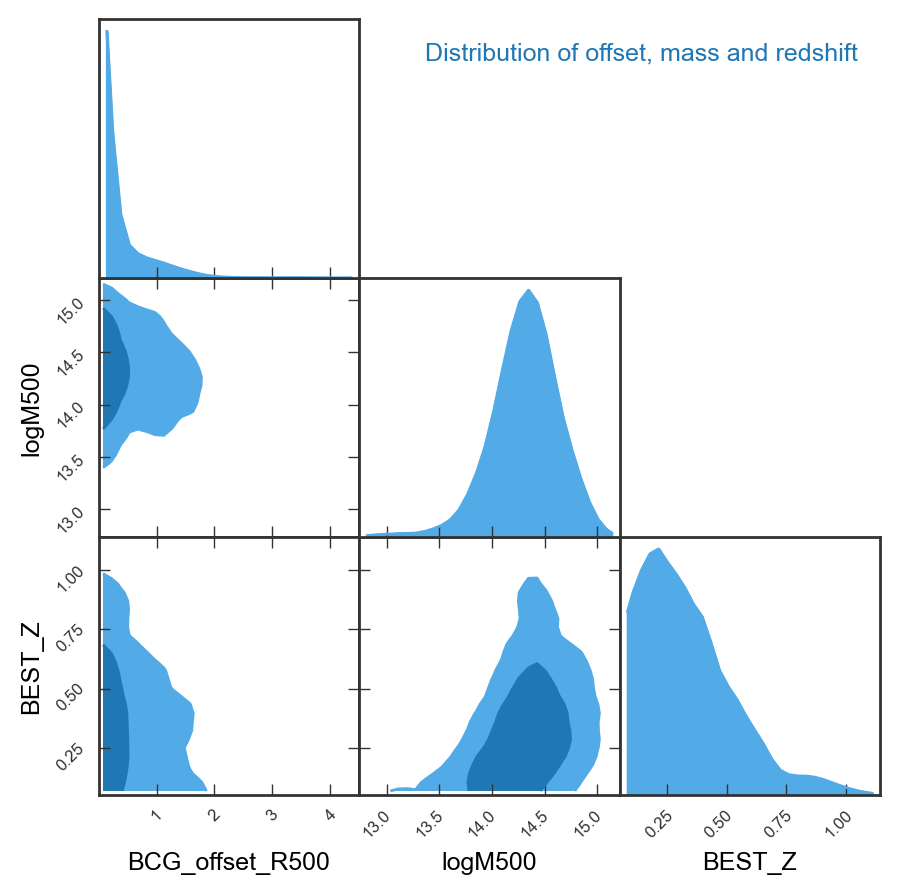

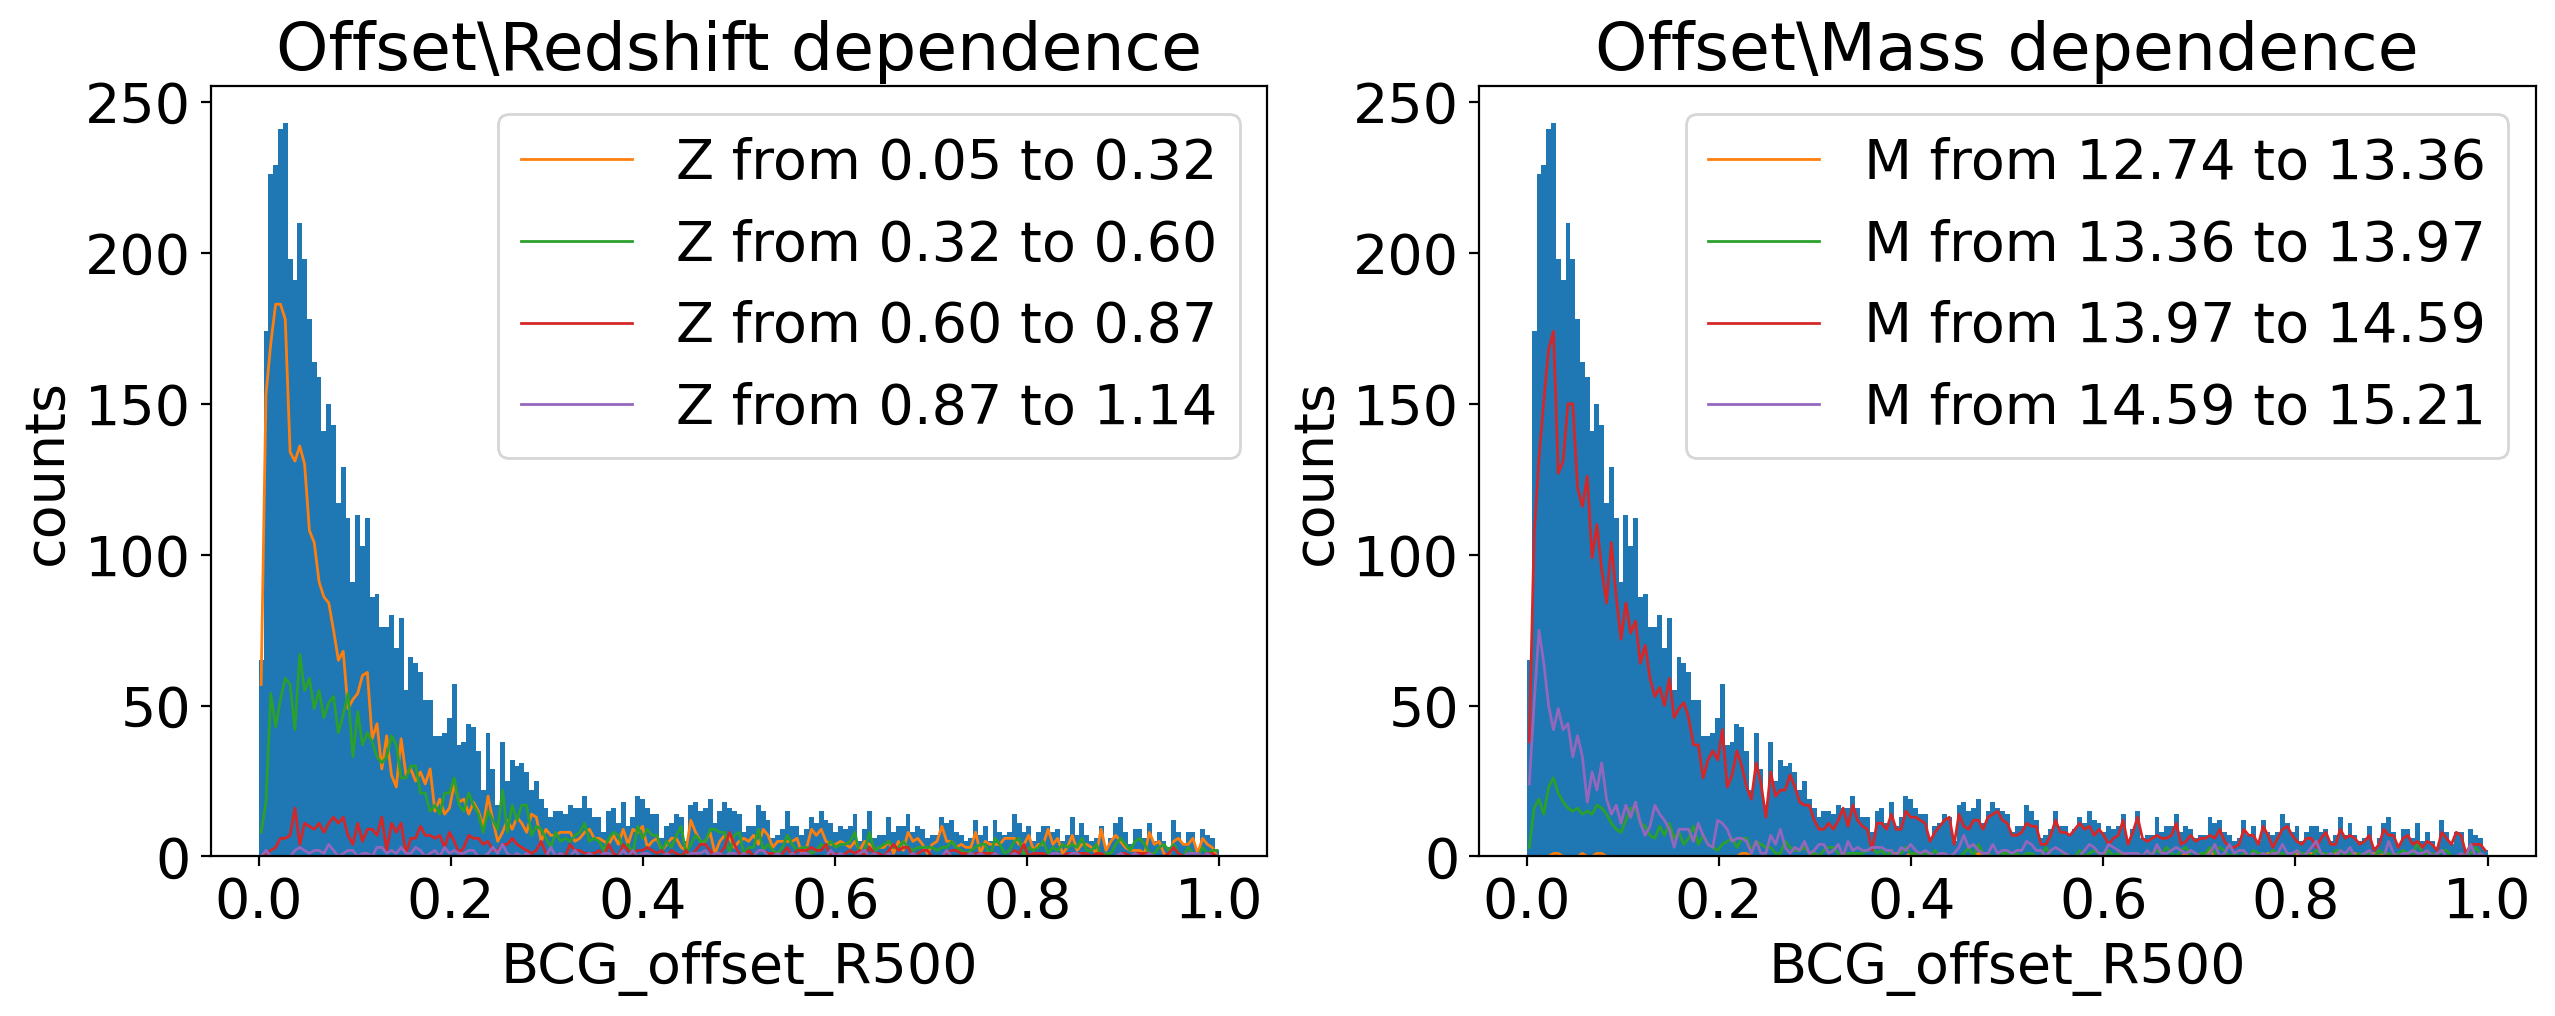

In [2]:
# get the middle points of the bins
def middle(bins):
    return (bins[:-1] + bins[1:]) / 2

# display the corner plot
GTC = pygtc.plotGTC(chains=SCID,
                    paramNames=['BCG_offset_R500', 'logM500', 'BEST_Z'],
                    chainLabels=['Distribution of offset, mass and redshift'],
                    figureSize='MNRAS_page')

# Fix a value for BEST_Z and plot the other variables
n = 4
bins = np.linspace(0, 1, 200)
mids = middle(bins)

# generate different "bins" to put the data in
Z_bins = np.linspace(SCID['BEST_Z'].min(), SCID['BEST_Z'].max(), n + 1)
M_bins = np.linspace(SCID['logM500'].min(), SCID['logM500'].max(), n + 1)

colors = ['red', 'green', 'pink']

fig, ax=plt.subplots(1,2, figsize=(15,5))
ax[0].hist(SCID['BCG_offset_R500'], bins)
ax[1].hist(SCID['BCG_offset_R500'], bins)

for i in range(n):
    # apply a filter on the data
    label = "Z from {:.2f} to {:.2f}".format(Z_bins[i],Z_bins[i+1])
    filtered = SCID[(SCID['BEST_Z'] >= Z_bins[i]) & (SCID['BEST_Z'] <= Z_bins[i+1])]
    y = np.histogram(filtered['BCG_offset_R500'], bins)[0]
    ax[0].plot(mids, y, label = label, linewidth = 1)
    
    
for i in range(n):
    # apply a filter on the data
    label = "M from {:.2f} to {:.2f}".format(M_bins[i],M_bins[i+1])
    filtered = SCID[(SCID['logM500'] >= M_bins[i]) & (SCID['logM500'] <= M_bins[i+1])]
    y = np.histogram(filtered['BCG_offset_R500'], bins)[0]
    ax[1].plot(mids, y, label = label, linewidth = 1)
    
ax[0].set_title('Offset\Redshift dependence')
ax[1].set_title('Offset\Mass dependence')

for ax in ax:
    ax.legend()
    ax.set_xlabel('BCG_offset_R500')
    ax.set_ylabel('counts')

Il grafico *"Distribution of offset, mass and redshift"* è un cornerplot che contiene le distribuzioni marginali (uno e due dimensionali) dei parametri che si sono valutati. La prima colonna è quella più interessante per i nostri scopi, ci mostra come la distribuzione del miscentering sia concentrata in una banda ristretta in massa e redshift: $LogM500 \in [14.0,14.5]$ e $BEST\_Z \in [0.00, 0.75]$, in cui sono presenti la maggiorparte dei dati. 

L'effetto di allontanarsi da questa regione è descritto dai grafici *"Offset\Redshift dependence"* e *"Offset\Mass dependence"*, in cui si vede che l'ampiezza del picco della miscentering distribution diminuisce per valori dei paramentri più grandi o più piccoli di quelli indicati.
Si nota però che la forma della distribuzione non cambia, vi è sempre un picco con decadimento esponenziale seguito da una coda. La diminuzione delle ampiezze fuori da questa regione può essere quindi spiegata dal fatto che nel campione delle code sono contenute un numero minore di misure. Questo porta a pensare che, in prima approssimazione, nella banda in cui sono concentrati i dati, la distribuzione dei miscentering non dipenda da massa e redshift. L'ipotesi dell'indipendenza della miscentering distribution è in accordo con i modelli proposti, nei quali i parametri di massa e redshift non compaiono.

## Sviluppo modelli
Per caratterizare la distribuzione del miscentering sono stati valutati due modelli: $S15$, e $Z19$. Entrambi descrivono la probabilità di osservare una certa distanza normalizzata $x$ attraverso tre parametri: $\rho$ la frazione di ammassi ben centrati, $\sigma_0$ la deviazione standard della distribuzione degli ammassi ben centrati e $\sigma_1$ la deviazione standard della distribuzione degli ammassi erroneamente centrati.
I modelli sono espressi secondo le seguenti formule:


**Modello S15** (Saro et al. 2015)
$$
P\left(x \mid \rho, \sigma_0, \sigma_1\right)=\rho \cdot \frac{x}{\sigma_0^2} \cdot \exp \left(-0.5 \cdot\left(\frac{x}{\sigma_0}\right)^2\right)+(1-\rho) \cdot \frac{x}{\sigma_1^2} \cdot \exp \left(-0.5 \cdot\left(\frac{x}{\sigma_1}\right)^2\right)
$$

**Modello Z19** (Zhang et al. 2019)
$$
P\left(x \mid \rho, \sigma_0, \sigma_1\right)=\rho \cdot \frac{1}{\sigma_0} \cdot \exp \left(-\frac{x}{\sigma_0}\right)+(1-\rho) \cdot \frac{x}{\sigma_1^2} \cdot \exp \left(-\frac{x}{\sigma_1}\right)
$$

Qui di seguito verranno analizzati, in particolare mettendo in evidenza gli effetti che i vari parametri hanno sulla forma delle loro distribuzioni.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


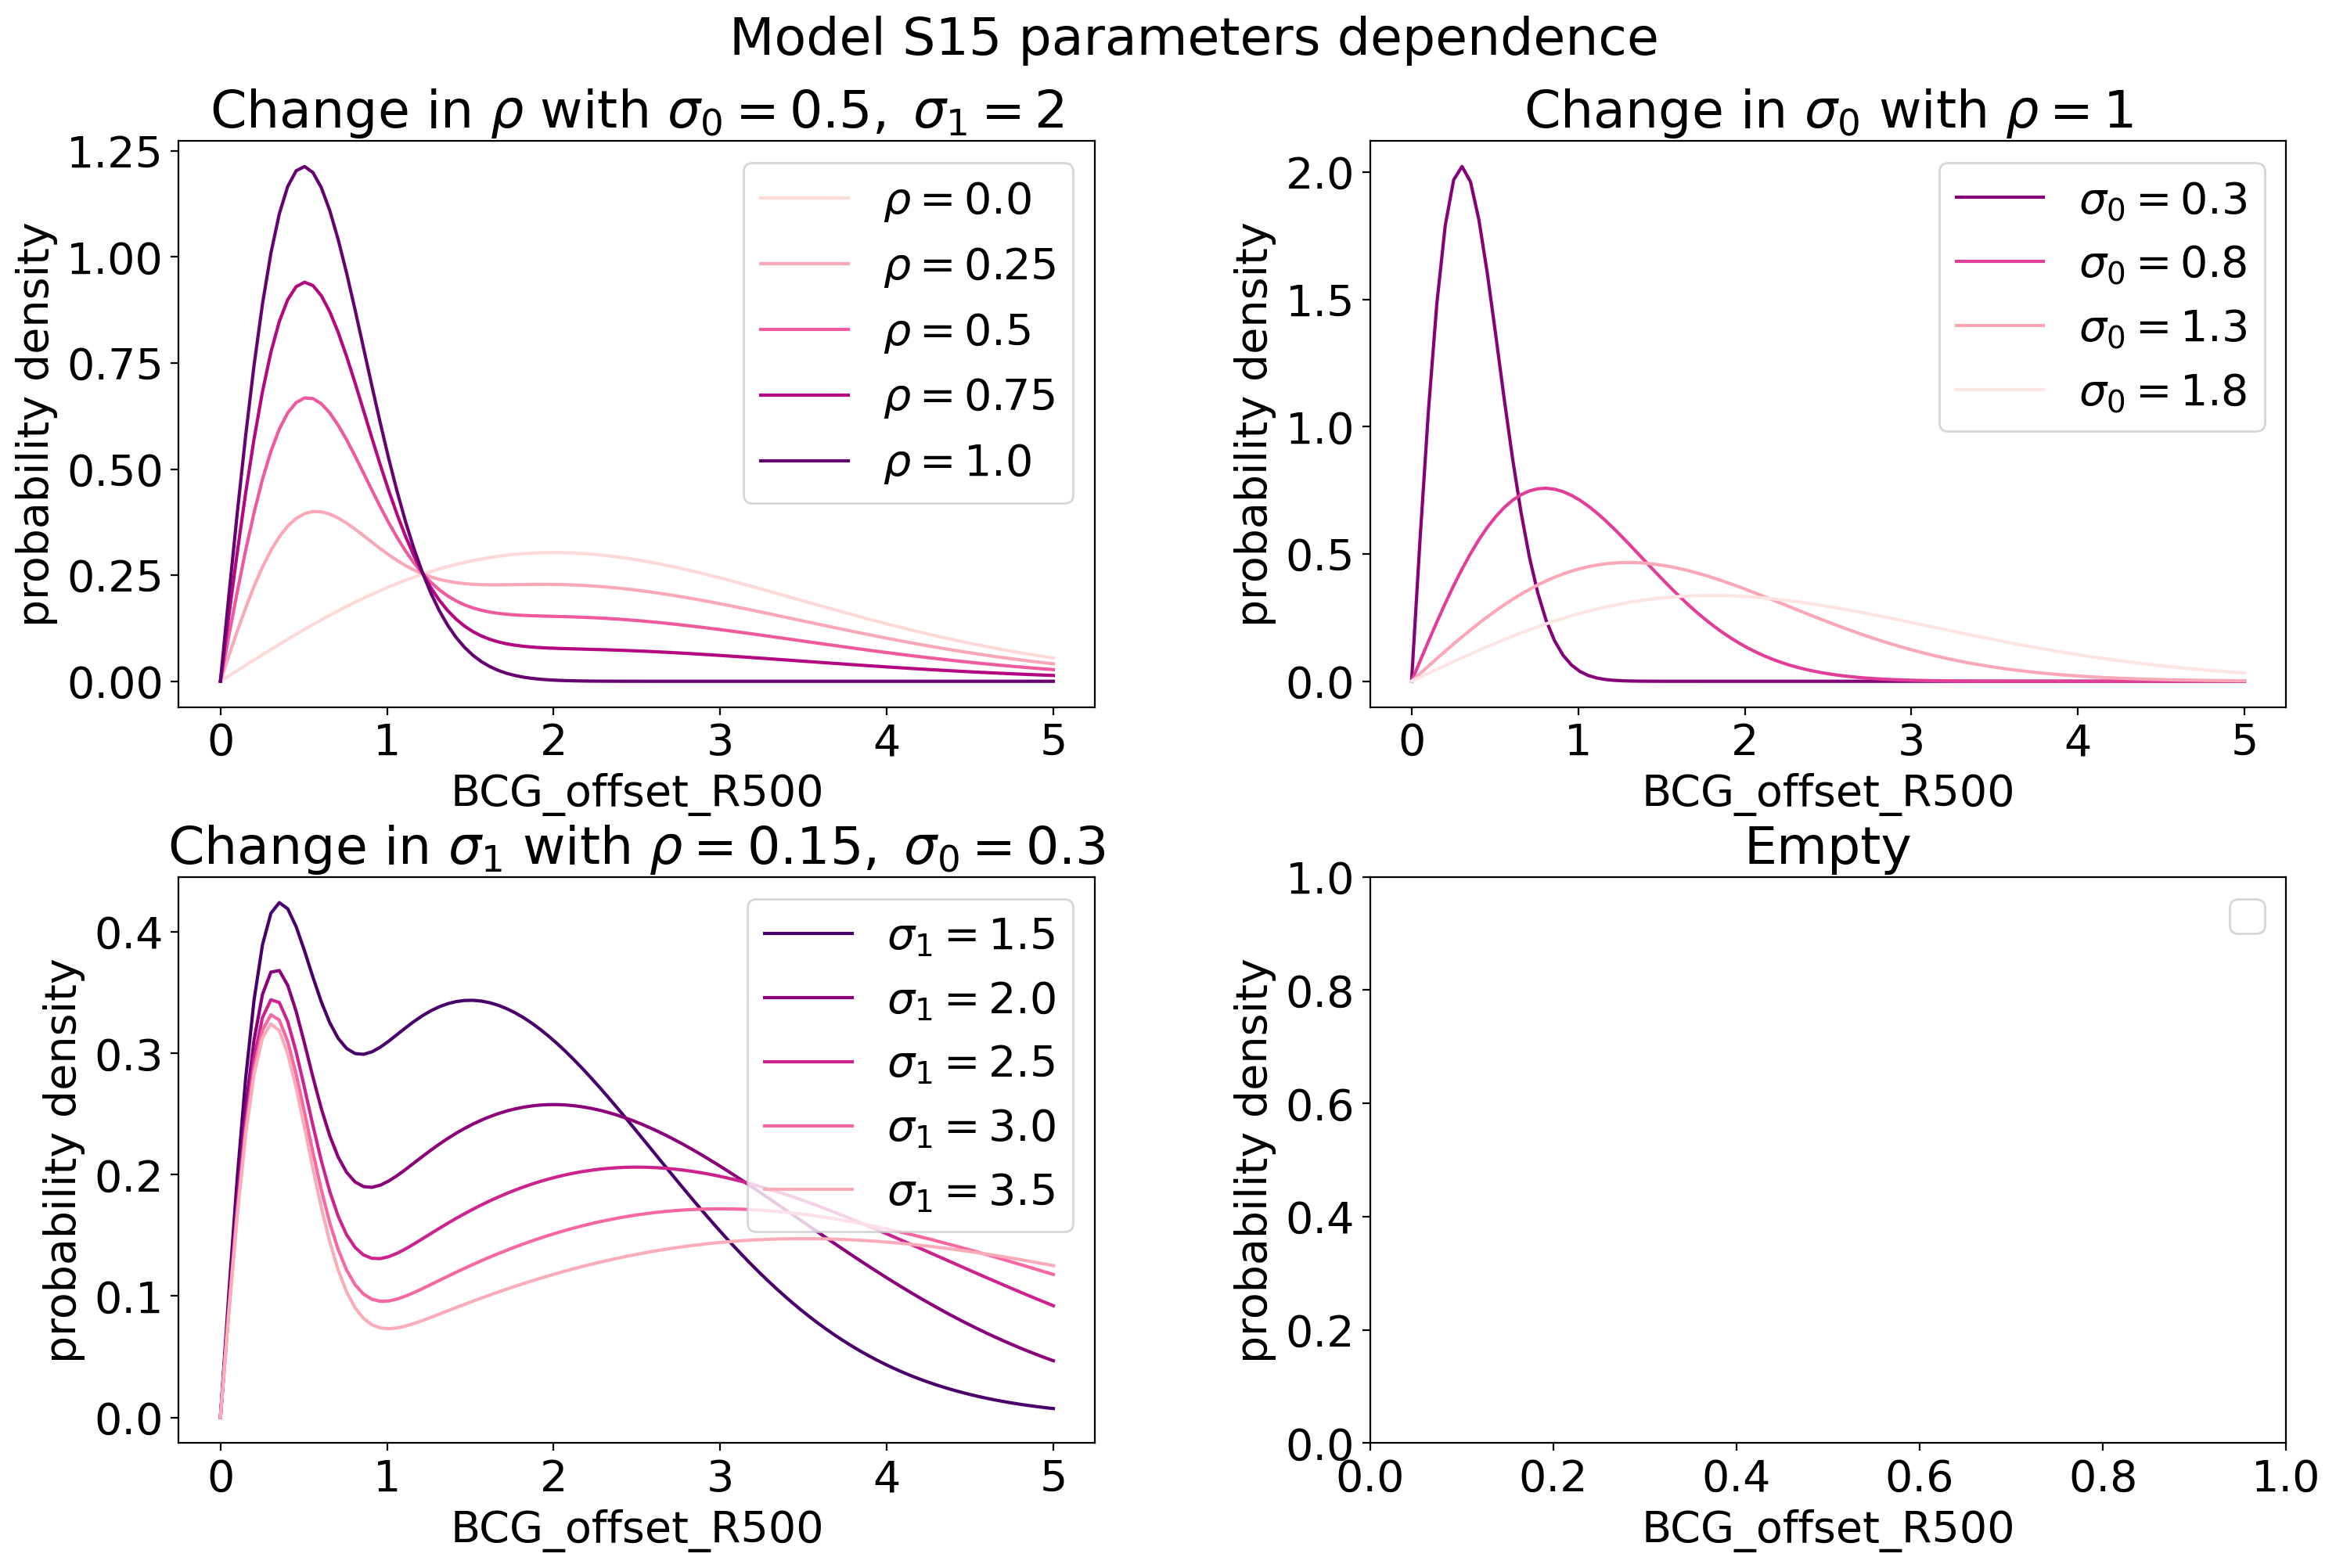

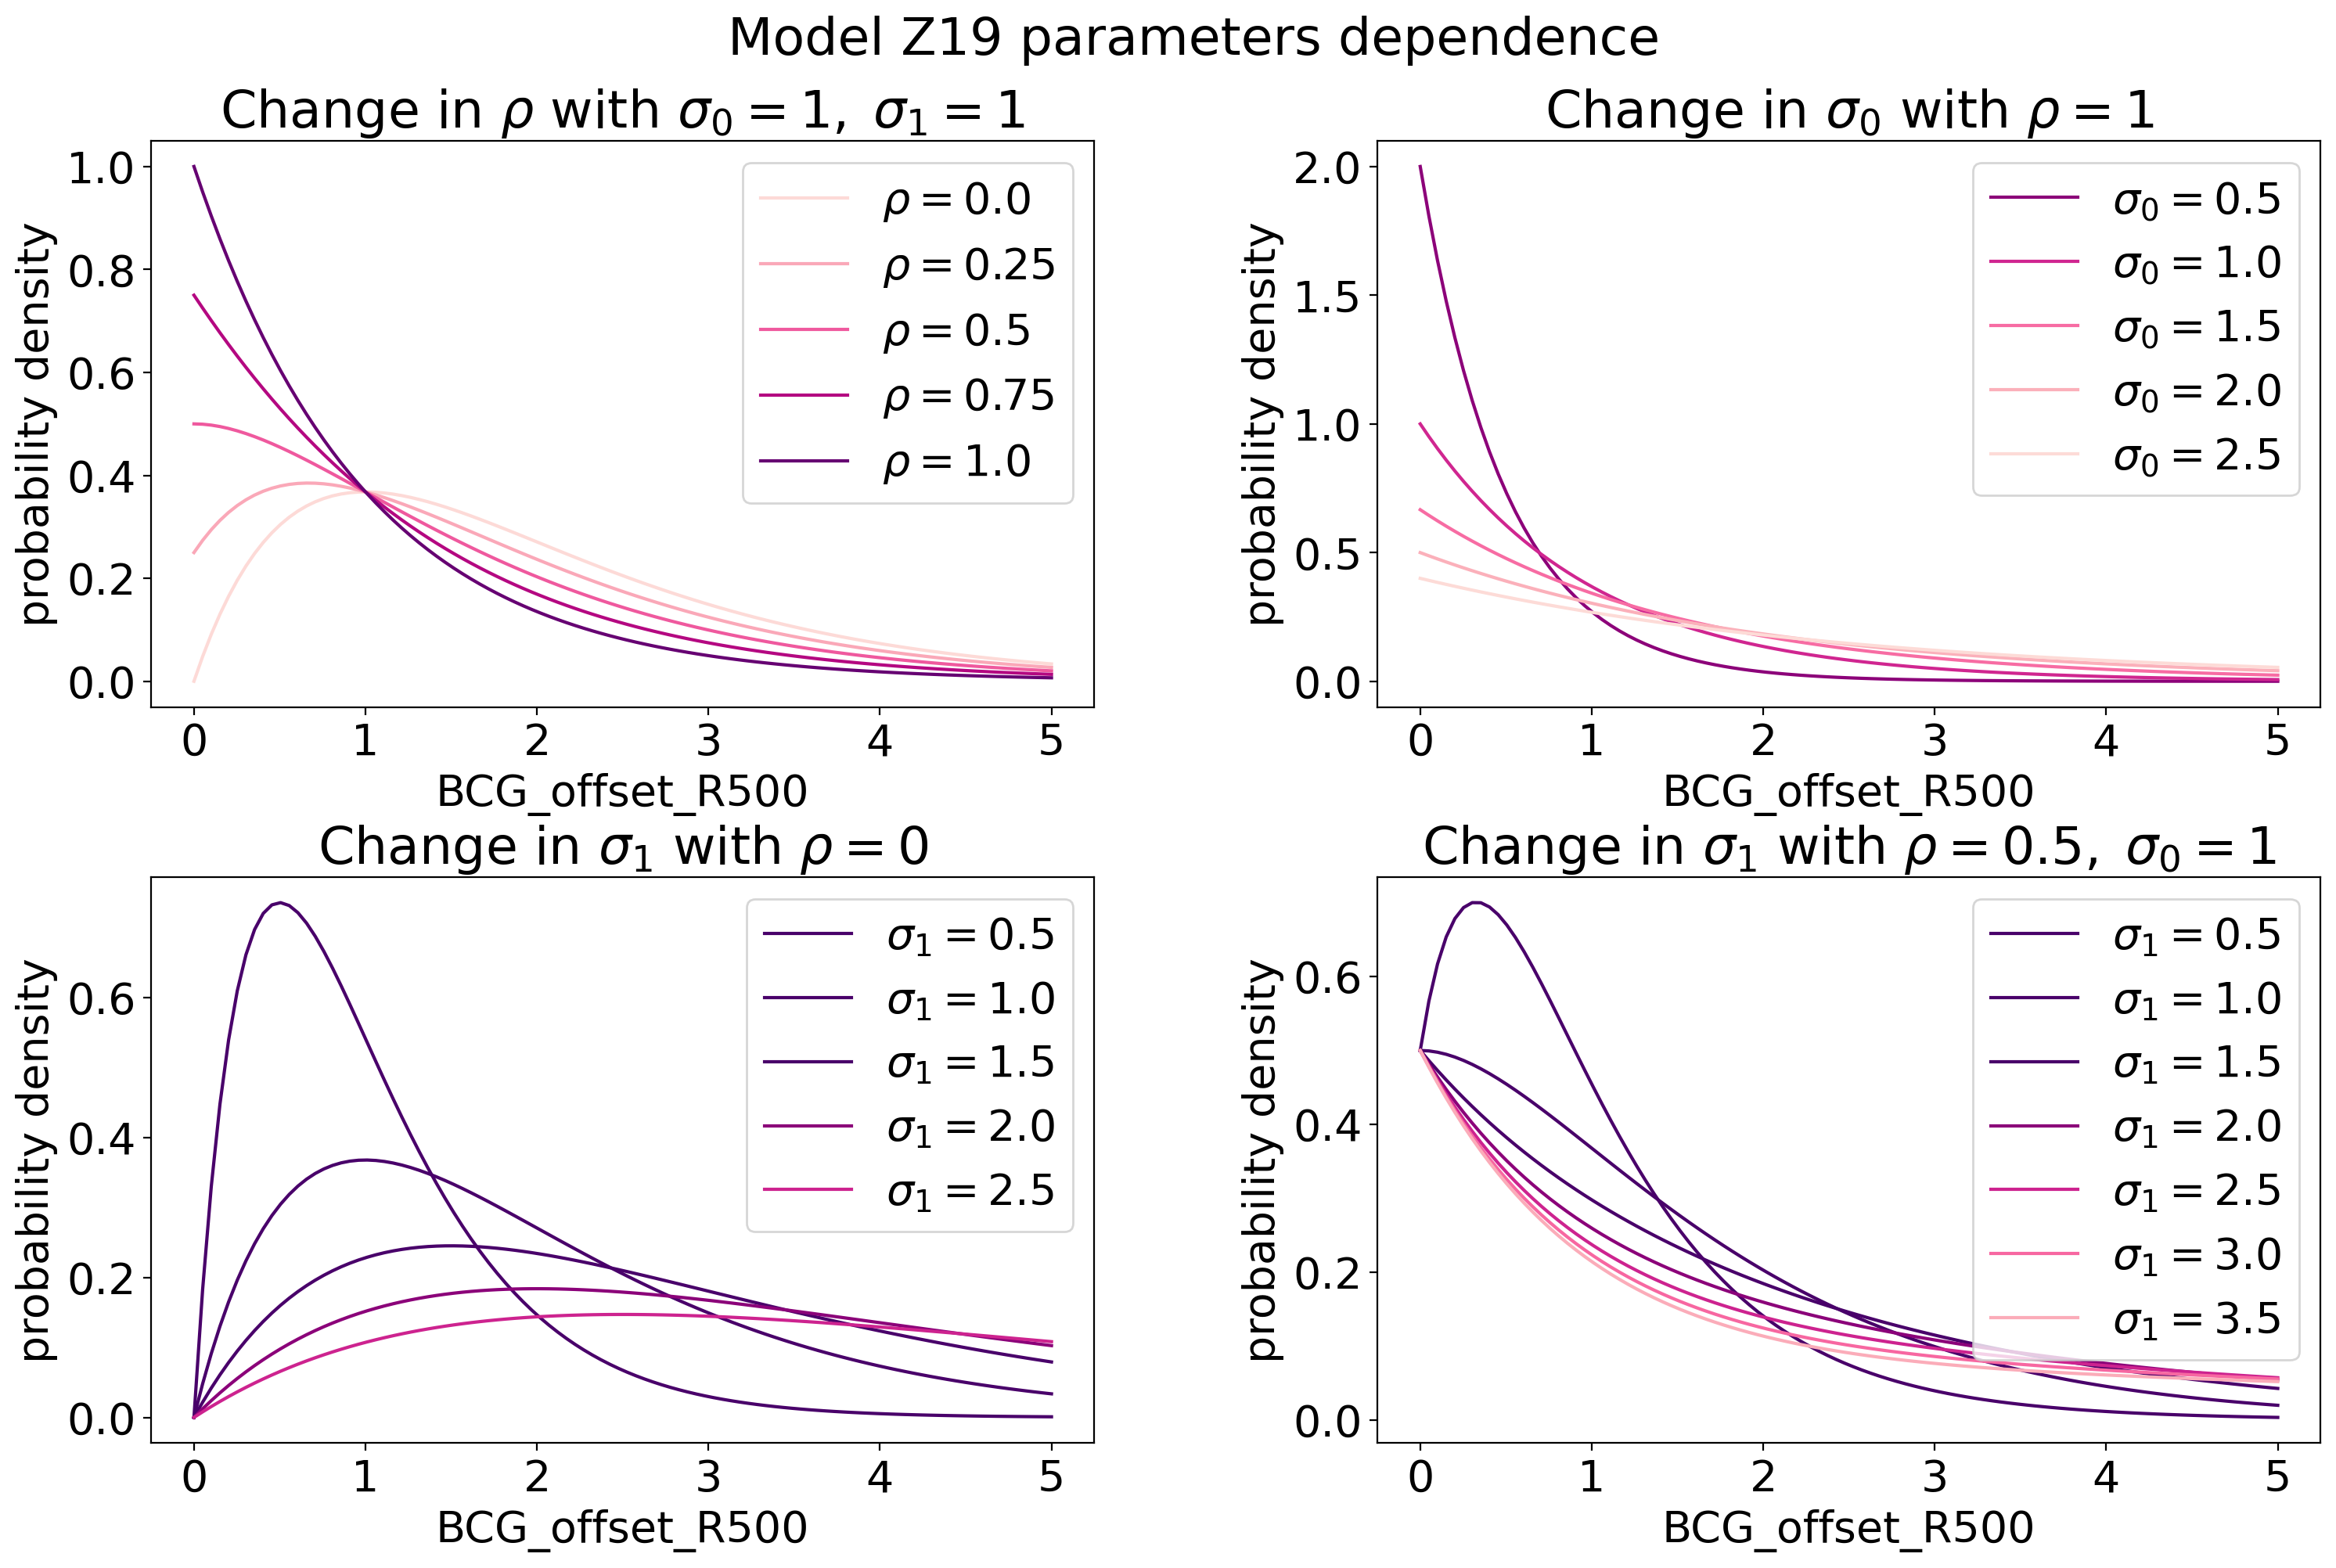

In [3]:
cmap = matplotlib.colormaps['RdPu']

# model definition
def S15(x, theta):
    rho, sigma0, sigma1 = theta
    centered = rho * x / (sigma0 ** 2) * np.exp(-0.5 * (x / sigma0) ** 2)
    miscentered = (1 - rho) * x / (sigma1 ** 2) * np.exp(-0.5 * (x / sigma1) ** 2)
    return centered + miscentered

def Z19(x, theta):
    rho, sigma0, sigma1 = theta
    centered = rho / sigma0 * np.exp(-x / sigma0)
    miscentered = (1 - rho) * x / sigma1 ** 2 * np.exp(-x / sigma1)
    return centered + miscentered

# color normalization for graphs
def cnorm(x):
    return (x + 0.2) / 1.3

# default parameters
rho = .5
sigma0 = .5
sigma1 = 2
theta = rho, sigma0, sigma1

# array of x points where the model is calculated
xrange = np.linspace(0, 5, 100)

### FIRST GRAPH
fig, ax = plt.subplots(2, 2, figsize = (15,10))

# change in rho
ax[0,0].set_title("Change in $\\rho$ with $\\sigma_0 = 0.5, \; \\sigma_1 = 2$")
arho = np.arange(start=0, stop=1.1, step=0.25)
for irho in arho:
    ax[0,0].plot(xrange, S15(xrange, (irho, sigma0, sigma1)),
                 c=cmap(cnorm(irho)),
                 label = f"$\\rho = {irho}$")

# change in sigma, pure
ax[0,1].set_title("Change in $\\sigma_0$ with $\\rho=1$")
asigma0 = np.arange(start=0.3, stop=2, step=.5)
for isigma0 in asigma0:
    ax[0,1].plot(xrange, S15(xrange, (1, isigma0, sigma1)), 
                 c = cmap(1 - 0.5 * isigma0),
                 label = f"$\\sigma_0 = {isigma0}$")
    
# change in sigma, real case example mixed
ax[1,0].set_title("Change in $\\sigma_1$ with $\\rho = 0.15, \; \\sigma_0 = 0.3$")
asigma1 = np.arange(start=1.5, stop=4, step=.5)
for isigma1 in asigma1:
    ax[1,0].plot(xrange, S15(xrange, (0.15, 0.3, isigma1)), 
                 c = cmap( 1.5 - isigma1 / 3),
                 label = f"$\\sigma_1 = {isigma1}$")

# empty
ax[1,1].set_title("Empty")

# legend and style
fig.tight_layout()
for iax in ax.flatten():
    iax.set(xlabel = "BCG_offset_R500",
           ylabel = "probability density")
    iax.legend()
plt.suptitle('Model S15 parameters dependence')
plt.subplots_adjust(top=0.9, wspace=0.3, hspace=0.3) 


### SECOND GRAPH
fig, ax = plt.subplots(2, 2, figsize = (15,10))

# change in rho
ax[0,0].set_title("Change in $\\rho$ with $\\sigma_0 = 1, \; \\sigma_1 = 1$")
arho = np.arange(start=0, stop=1.1, step=0.25)
for irho in arho:
    ax[0,0].plot(xrange, Z19(xrange, (irho, 1, 1)), 
                 c=cmap(cnorm(irho)),
                 label = f"$\\rho = {irho}$")

# change in sigma0, pure
ax[0,1].set_title("Change in $\\sigma_0$ with $\\rho = 1$")
asigma0 = np.arange(start=0.5, stop=3, step=.5)
for isigma0 in asigma0:
    ax[0,1].plot(xrange, Z19(xrange, (1, isigma0, sigma1)), 
                 c = cmap(1 - 0.34 * isigma0),
                 label = f"$\\sigma_0 = {isigma0}$")
    
# change in sigma1, pure
ax[1,0].set_title("Change in $\\sigma_1$ with $\\rho = 0$")
asigma1 = np.arange(start=0.5, stop=3, step=.5)
for isigma1 in asigma1:
    ax[1,0].plot(xrange, Z19(xrange, (0, sigma0, isigma1)), 
                 c = cmap( 1.5 - isigma1 / 3),
                 label = f"$\\sigma_1 = {isigma1}$")
    
# real case example, mixed, change in sigma 1
ax[1,1].set_title("Change in $\\sigma_1$ with $\\rho = 0.5, \; \\sigma_0 = 1$")
asigma1 = np.arange(start=.5, stop=4, step=.5)
for isigma1 in asigma1:
    ax[1,1].plot(xrange, Z19(xrange, (.5, 1, isigma1)), 
                 c = cmap( 1.5 - isigma1 / 3),
                label = f"$\\sigma_1 = {isigma1}$")
    
# legend and style
fig.tight_layout()
for iax in ax.flatten():
    iax.set(xlabel = "BCG_offset_R500",
           ylabel = "probability density")
    iax.legend()
plt.suptitle('Model Z19 parameters dependence')
plt.subplots_adjust(top=0.9, wspace=0.3, hspace=0.3) 

Il modello $S15$ consinste in un interpolazione lineare tra due distribuzioni gaussiane pesata sul parametro $\rho$. Le gaussiane hanno valore di aspettazione zero ma sono modulate dal fattore moltiplicativo $x/\sigma^2$. La presenza di questo fattore fa si che la funzione abbia una crescita quasi lineare nell'origine, poi un picco ed infine un decadimento esponenziale dominato dalla coda della gaussiana. 

Dai grafici nella figura *"Model S15 parameters dependence"* si vede come il fattore $\rho$ agisca come fattore di peso delle due gaussiane (primo grafico in alto a sinistra) e come la deviazione standard $\sigma$ influenzi la forma della distribuzione (in alto a destra) allungandola o restringendola.

Anche il modello $Z19$ è un interpolazione, ma questa volta tra due distribuzioni esponenziali. Un altra differenza importante è che questa volta le distribuzioni **non sono simmetriche**, come avveniva nel modello S15, ma la seconda distribuzione è moderata da un termine lineare in più: $x/\sigma$. Questo fattore agisce da *"high pass filter"* e rimuove il picco iniziale della distribuzione. 
L'asimettria tra le distribuzioni comporta la presenza di due regioni caratteristice: per valori di $x$ bassi la funzione è dominata dal primo termine esponenziale ed ha quindi un picco descritto dal parametro $\sigma_0$, per valore di $x$ grandi la coda è dominata dalla seconda distribuzione esponenziale ed è quindi descritta dal parametro $\sigma_1$ . 
Queste sono tendenze generali, ma in realtà si osserva dall'ultimo grafico, quello in basso a destra di figura *"Model Z19 parameters dependence"*, che la regione vicina a zero, in alcune configurazioni di $\rho$ e $\sigma_0$, è *altamente sensibile* ai cambiamenti del parametro $\sigma_1$.

# Analisi Bayesisana
Arrivati a questo punto vorremmo capire qual'è la migliore stima dei parametri $\theta=(\rho, \sigma_0, \sigma_1)$ che avvicinano di più i modelli al campione dati presi da eRosita. 

Un modo per ottenere le stime è quello di usare il teorema di Bayes per invertire la distribuzione di probabilità data dal modello ed ottenere quella che descrive i parametri. Nella sua forma generale il teorema di Bayes è il seguente:

$$
P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
$$

Dove $A$ e $B$ sono due eventi generici. Sostituendo ad $A$ i parametri $\theta$, che vogliamo stimare supponendo per vero il modello $M$, e a $B$ i dati osservati $d$ possiamo migliorare le nostre supposizioni iniziali sulla distribuzione dei parametri.
La formula di Bayes assume la seguente forma:

$$
    P(p|d M) = \frac{P(d|p M) \cdot P(p|M)}{P(d|M)}
$$

dove $P(p|d M)$ prende il nome di *posterior distribution*, ed è quella che ci interessa perché permette di stimare i parametri del modello partendo dal campione. La probabilità $P(d|p M)$ prende il nome di *likelihood* ed esprime la probabilità di ottenere il campione supponendo vero il modello teorico. Il termine $ P(p|M)$ prende il nome di *prior distribution* e rappresenta le nostre conoscenze a priori sui dati.

Il valore di $\theta$ che massimizza la posterior è la stima migliore del valore vero dei parametri a partire dal campione.

### Implementazione python

Cominciamo con il definire le funzioni di likelihood, prior e posterior per i modelli teorici. Non avendo a disposizione nessuna informazione sul prior si assume equiprobabilità a priori per valori sensati dei paramentri.

In [4]:
def log_prior(theta):
    rho, sigma0, sigma1 = theta
    # accept only values for wich rho and sigma actually make sense
    if rho <= 1 and rho >= 0 and sigma0 > 0 and sigma1 > 0:
        return 0.0
    return -np.inf

def log_likelihood(theta, x, model):
    return np.nansum(np.log(model(x,theta)))

def log_posterior(theta, x,  model):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, model)

Per una prima stima del massimo della funzione (ovvero il minimo funzione cambiata di segno) si è usata la funzione *minimize* di scipy, tuttavia sono stati riscontrati alcuni problemi di convergenza, poi risolti cambiando il solver standard con [*Nelder-Mead*](https://stackoverflow.com/questions/24767191/scipy-is-not-optimizing-and-returns-desired-error-not-necessarily-achieved-due).

In [5]:
from scipy.optimize import minimize
nll = lambda *args: -log_posterior(*args)

# S15
initial_theta = (0.6, .07, 0.2)
S15_soln = minimize(nll, initial_theta, (SCID['BCG_offset_R500'], S15), method = 'Nelder-Mead')

print(f"S15 minimization point: {S15_soln.x}")

# Z19
initial_theta = (0.9, .4, 4)
Z19_soln = minimize(nll, initial_theta, (SCID['BCG_offset_R500'], Z19), method = 'Nelder-Mead')

print(f"Z19 minimization point: {Z19_soln.x}")

S15 minimization point: [0.62825071 0.06700427 0.62300086]
Z19 minimization point: [0.68043029 0.09869577 0.39155585]


### EMCEE SAMPLING
Per campionare la posterior distribution è stato usato l'algoritmo *emcee*, che permette di generare un campione statistico rappresentativo di una distribuzione attraverso l'uso di *"walkers"*. Ogni walker esplora lo spazio multidimensionale dei parametri, in questo caso $\theta$, facendo dei passi in direzioni diverse che dipendono dalla posizione di tutti gli altri walkers. 
Il campione sintetico generato da questo algoritmo può essere usato per fare inferenze statistiche, una volta rimosse le correlazioni tra i dati.

L'algoritmo emcee sarà usato per campionare la posterior e le distribuzioni marginali permetteranno di stimare il valore da dare ai parametri, con relative incertezze.

In [6]:
### RUN ONLY IF NECESSARY, IT'S VERY LONG ###
import emcee

# start walking
pos = S15_soln.x * (1 + 1e-4 * np.random.randn(32,3))
nwalkers, ndim = pos.shape

S15_sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_posterior, args=(SCID['BCG_offset_R500'], S15)
    )
S15_sampler.run_mcmc(pos, 2000, progress=True)

# start walking
pos = Z19_soln.x * (1 + 1e-4 * np.random.randn(32,3))
nwalkers, ndim = pos.shape

Z19_sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_posterior, args=(SCID['BCG_offset_R500'], Z19)
    )
_ = Z19_sampler.run_mcmc(pos, 2000, progress=True)

100%|██████████| 2000/2000 [00:46<00:00, 42.83it/s]


Per verificare che l'esplorazione dello spazio dei parametri sia andata a buon fine controlliamo che i walkers non siano rimasti intrappolati in qualche minimo locale, ma che abbiano esplorato tutto lo spazio dei parametri della posterior.

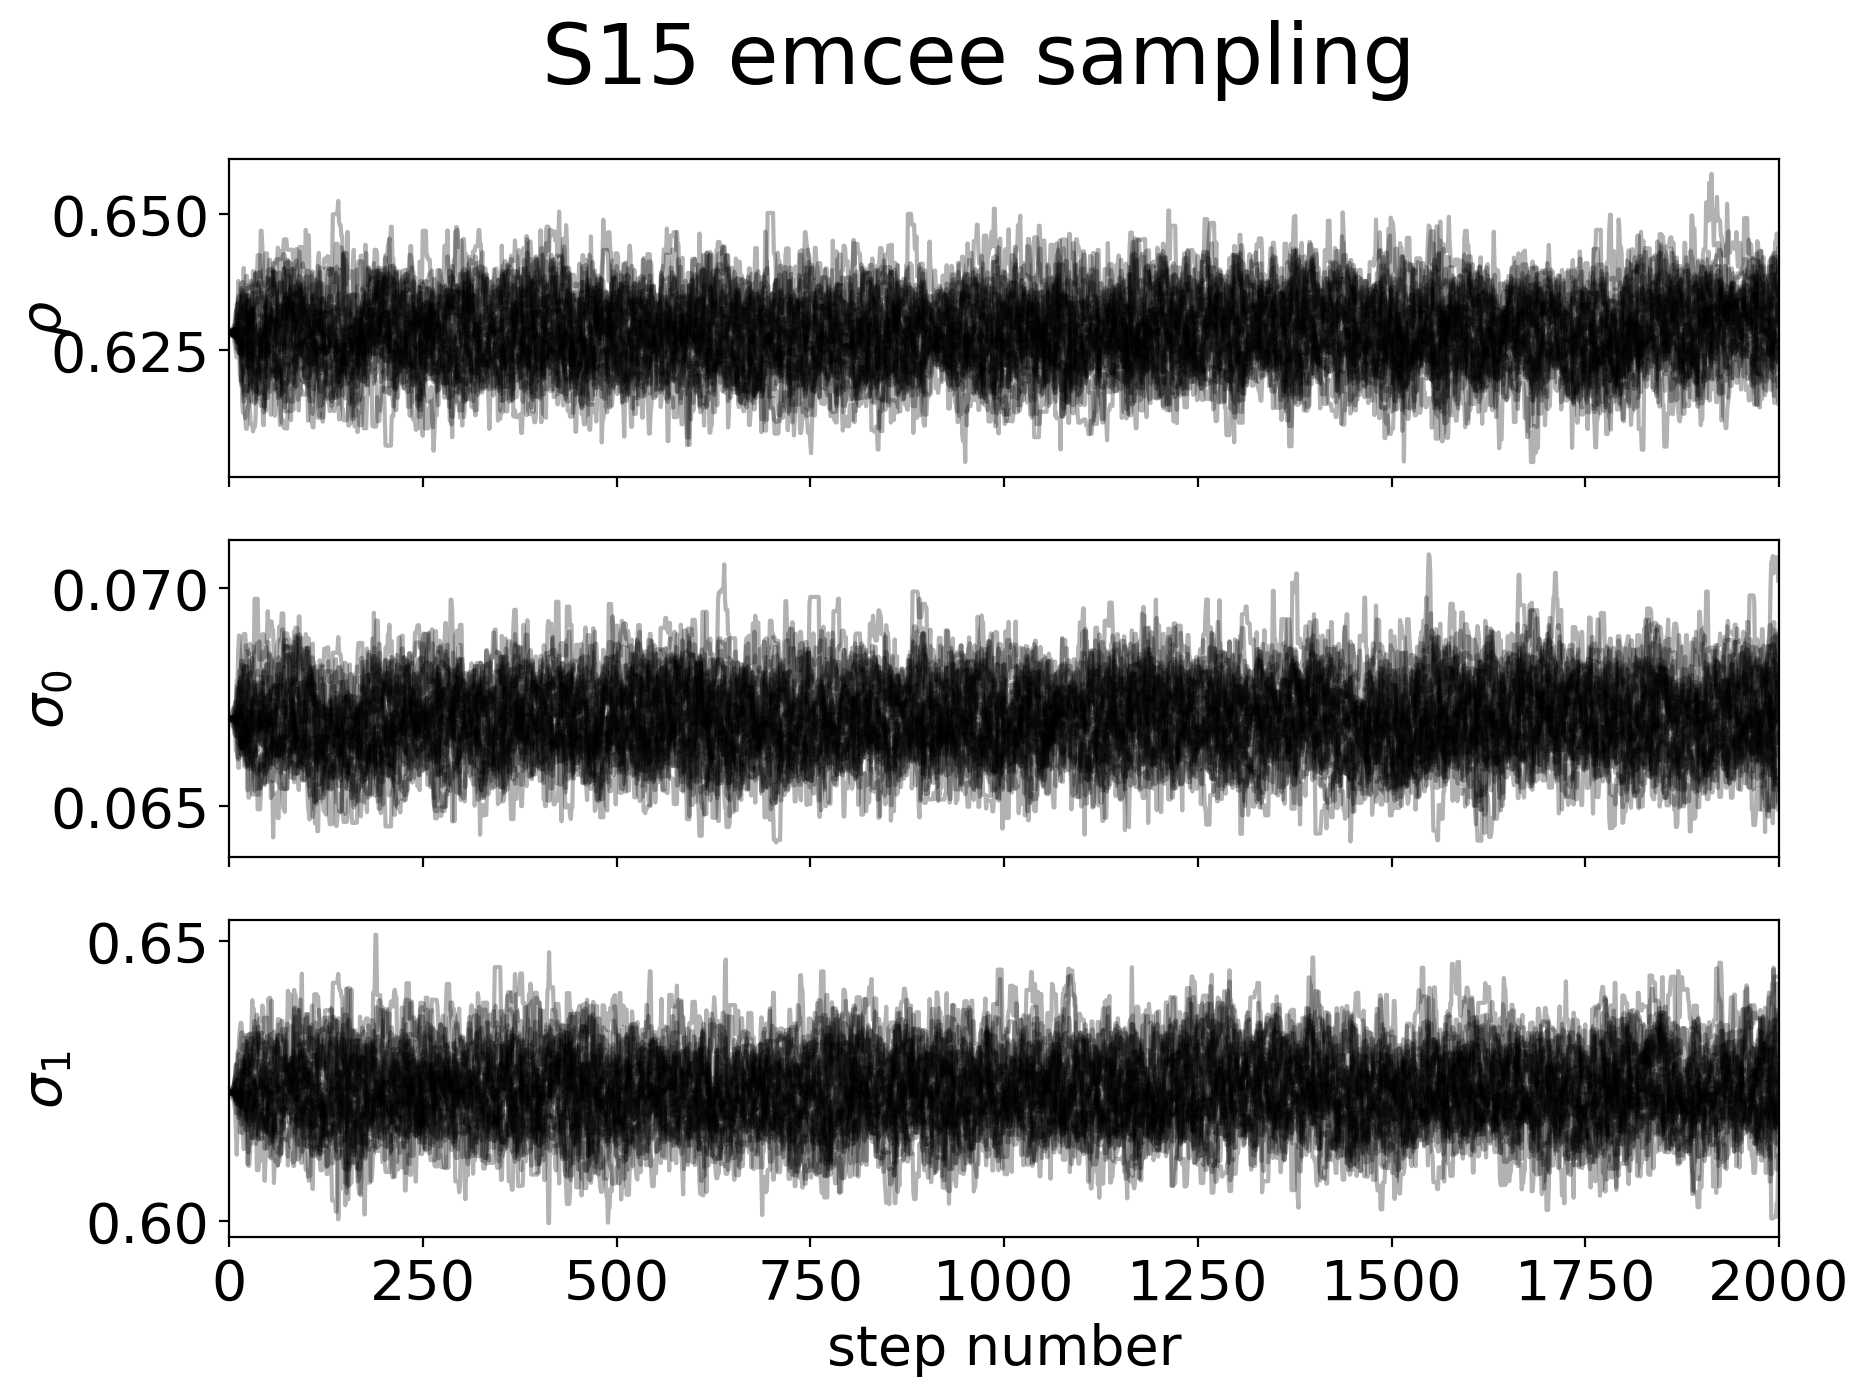

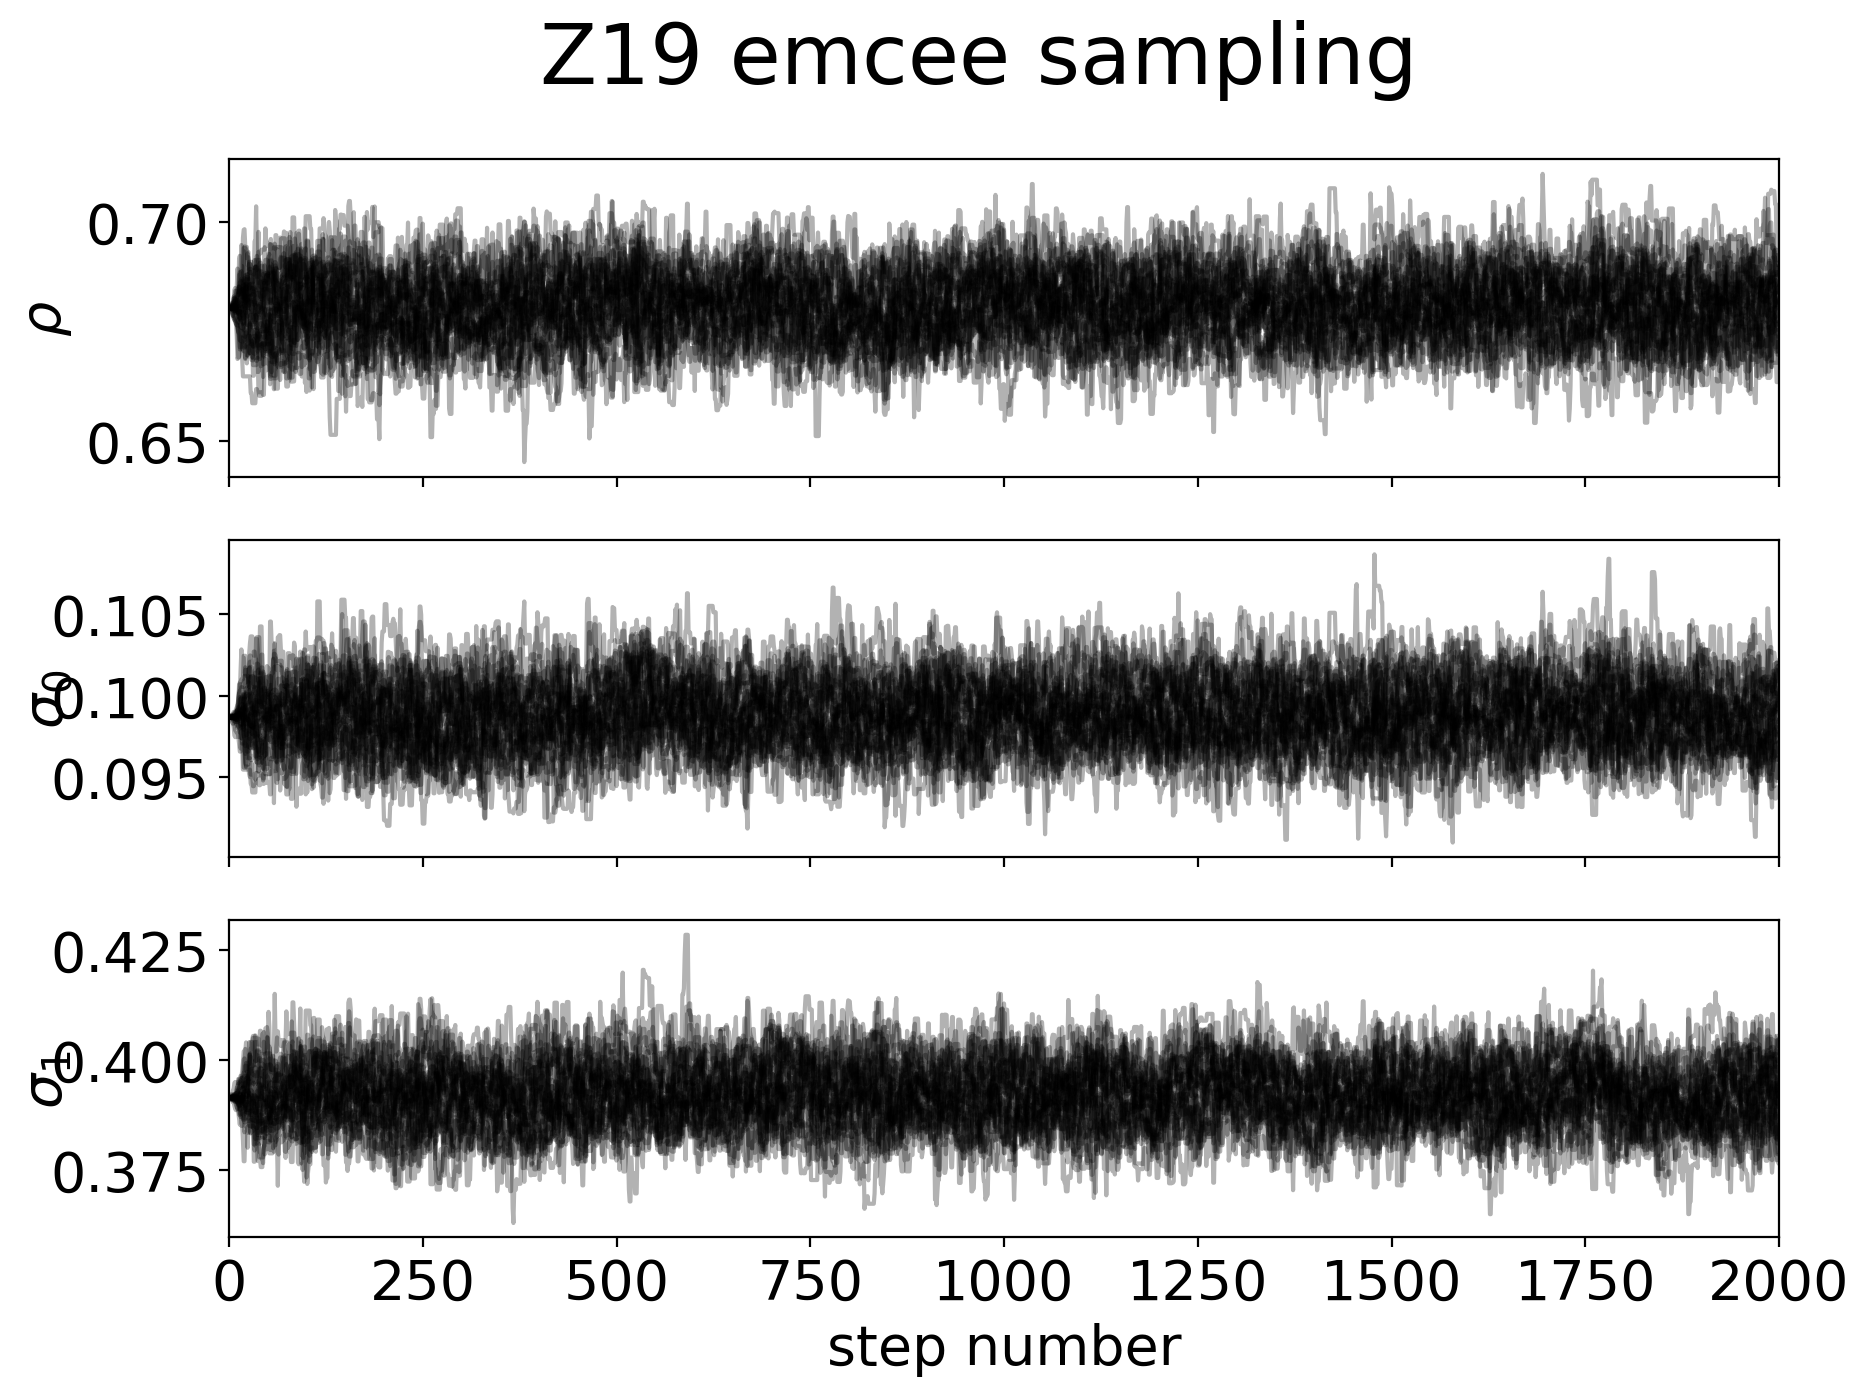

In [66]:
fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
samples = S15_sampler.get_chain()
labels = ["$\\rho$", "$\sigma_0$", "$\sigma_1$"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

_ = axes[-1].set_xlabel("step number")
fig.suptitle('S15 emcee sampling', fontsize=30)

fig, axes = plt.subplots(3, figsize=(10, 7), sharex=True)
samples = Z19_sampler.get_chain()
labels = ["$\\rho$", "$\sigma_0$", "$\sigma_1$"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

_ = axes[-1].set_xlabel("step number")
_ = fig.suptitle('Z19 emcee sampling', fontsize=30)


Nel campione proveniente dai walkers sono presenti delle correlazioni dovute al funzionamento dell'algoritmo emcee. Ovviamente nella posterior vera i dati non sono correlati, per cui risulta importante selezionare un sottocampione con correlazione minore, senza pero perdere troppi dati. Uno dei modi per stimare questa correlazione è usare la funzione [*get_autocorr_time*](https://emcee.readthedocs.io/en/stable/tutorials/autocorr/), che fornisce una stima del numero di passi che servono affinché due campioni non siano più correlati tra di loro. 

Si sono dunque applicati i seguenti filtri:
- Sono stati rimossi i primi cento dati in modo da lasciare tempo ai walkers di disperdersi nello spazio dei parametri, partendo dal punto di minimo.
- Si sono tenuti solo uno ogni 15 eventi generati (circa metà dell'autocorrelation time) in modo da contrastare parzialmente gli effetti della correlazione, senza però scartare troppi dati.

In [8]:
# S15
tau = S15_sampler.get_autocorr_time()
print(f"S15 Correlation times: {tau}")
emcee_samples['S15'] = S15_sampler.get_chain(discard=100, thin=15, flat=True)

print(f"S15 Flat samples shape: {emcee_samples['S15'].shape}")
print("S15 Flat samples matrix:")
print(emcee_samples['S15'])

# Z19
print("\n\n")
tau = Z19_sampler.get_autocorr_time()
print(f"Z19 Correlation times: {tau}")
emcee_samples['Z19'] = Z19_sampler.get_chain(discard=100, thin=15, flat=True)

print(f"Z19 Flat samples shape: {emcee_samples['Z19'].shape}")
print("Z19 Flat samples matrix:")
print(emcee_samples['Z19'])

S15 Correlation times: [35.0059949  37.07776198 32.88891886]
S15 Flat samples shape: (4032, 3)
S15 Flat samples matrix:
[[0.63028978 0.06518503 0.61827973]
 [0.63574179 0.06665453 0.61751888]
 [0.62440041 0.06692129 0.61969814]
 ...
 [0.62359175 0.06740023 0.63056224]
 [0.63423863 0.06861091 0.62980972]
 [0.62953979 0.0664494  0.61494264]]



Z19 Correlation times: [34.25547781 35.18478574 32.32324038]
Z19 Flat samples shape: (4032, 3)
Z19 Flat samples matrix:
[[0.69035053 0.09887219 0.39770879]
 [0.67688616 0.09535446 0.39212305]
 [0.69323193 0.10579879 0.40927648]
 ...
 [0.68667724 0.09721178 0.38731607]
 [0.66953994 0.09519498 0.40051068]
 [0.68136193 0.09791912 0.39407931]]


Con i dati rimasti è possibile fare inferenza statistica sul valore dei parametri e sulle loro incertezze. Un grafico utile da fare è un corner-plot che metta in evidenza le distribuzioni marginali del campione montecarlo.

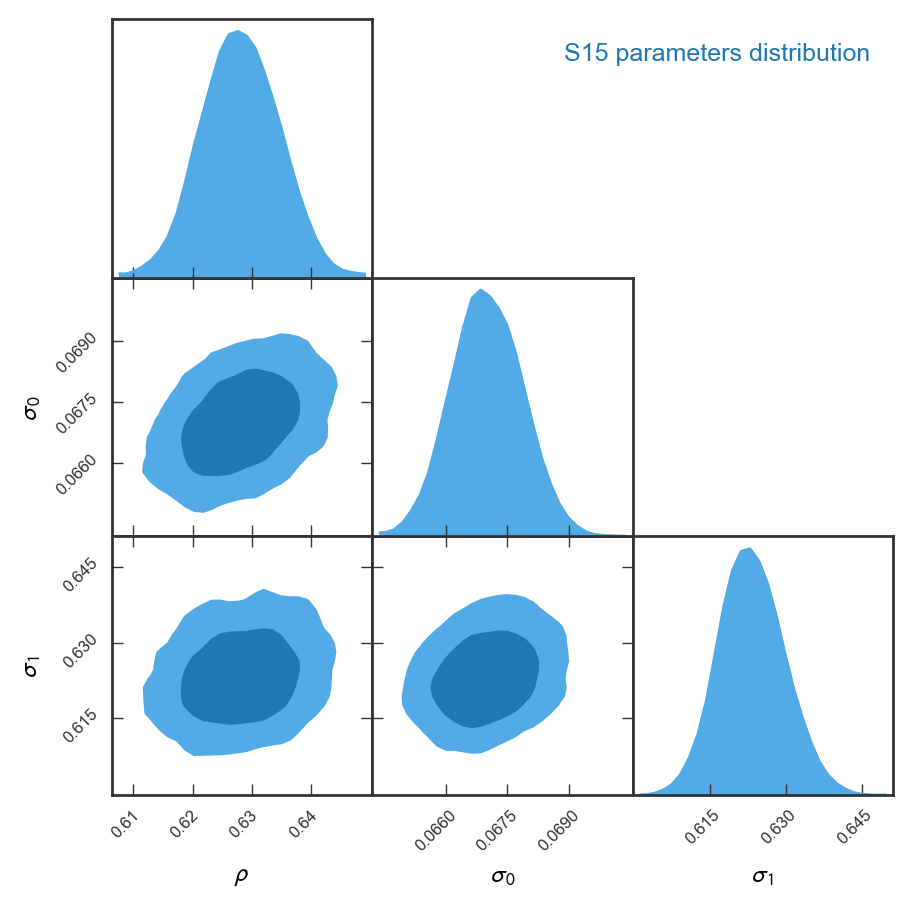

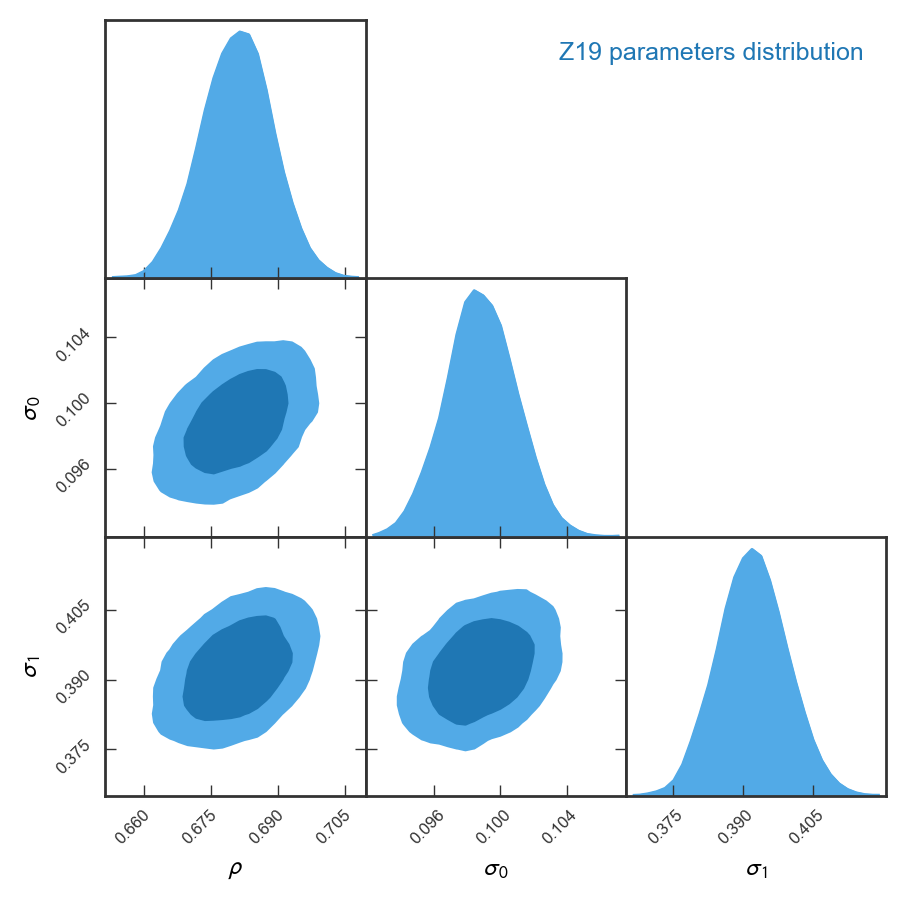

In [9]:
GTC = pygtc.plotGTC(chains=emcee_samples['S15'],
                    paramNames=["$\\rho$", "$\sigma_0$", "$\sigma_1$"],
                    chainLabels=['S15 parameters distribution'],
                    figureSize='MNRAS_page')
GTC = pygtc.plotGTC(chains=emcee_samples['Z19'],
                    paramNames=["$\\rho$", "$\sigma_0$", "$\sigma_1$"],
                    chainLabels=['Z19 parameters distribution'],
                    figureSize='MNRAS_page')

Ci sono vari modi per ricavare i valori dei parametri; quello scelto in questa analisi è stato di prendere come valore migliore il 50 esimo percentile delle distribuzioni, e come errori il 16 esimo e l'84 esimo percentile.

In [10]:
# compute the percentiles and save them
from IPython.display import display, Math
labels = ["\\rho", "\sigma_0", "\sigma_1"]

S15_best_theta = np.ndarray((3,3))
print(f"S15 best theta")
for i in range(ndim):
    mcmc = np.percentile(emcee_samples['S15'][:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))
    S15_best_theta[:,i] = [q[0], mcmc[1], q[1]]
print(S15_best_theta)

S15 best theta


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

[[0.00623688 0.0008245  0.00579137]
 [0.62788198 0.06698145 0.62295704]
 [0.00660162 0.00086346 0.00653659]]


In [11]:
Z19_best_theta = np.ndarray((3,3))
print(f"Z19 best theta")
for i in range(ndim):
    mcmc = np.percentile(emcee_samples['Z19'][:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))
    Z19_best_theta[:,i] = [q[0], mcmc[1], q[1]]
print(Z19_best_theta)

Z19 best theta


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

[[0.00789256 0.00197725 0.00704742]
 [0.68089098 0.09877455 0.39197871]
 [0.00735103 0.00214865 0.00722707]]


Per avere una prima valutazione dell'accordo tra i parametri proposti e i dati si sono sovraimposti i modelli migliori alla distribuzione del miscentering reale. Sono stati anche graficati, con alta trasparenza, 100 modelli per altri valori di $\theta$ presi a caso tra quelli generati. In questo modo si può avere una prima intuizione qualitativa sulla compatibilità dei modelli coi dati.

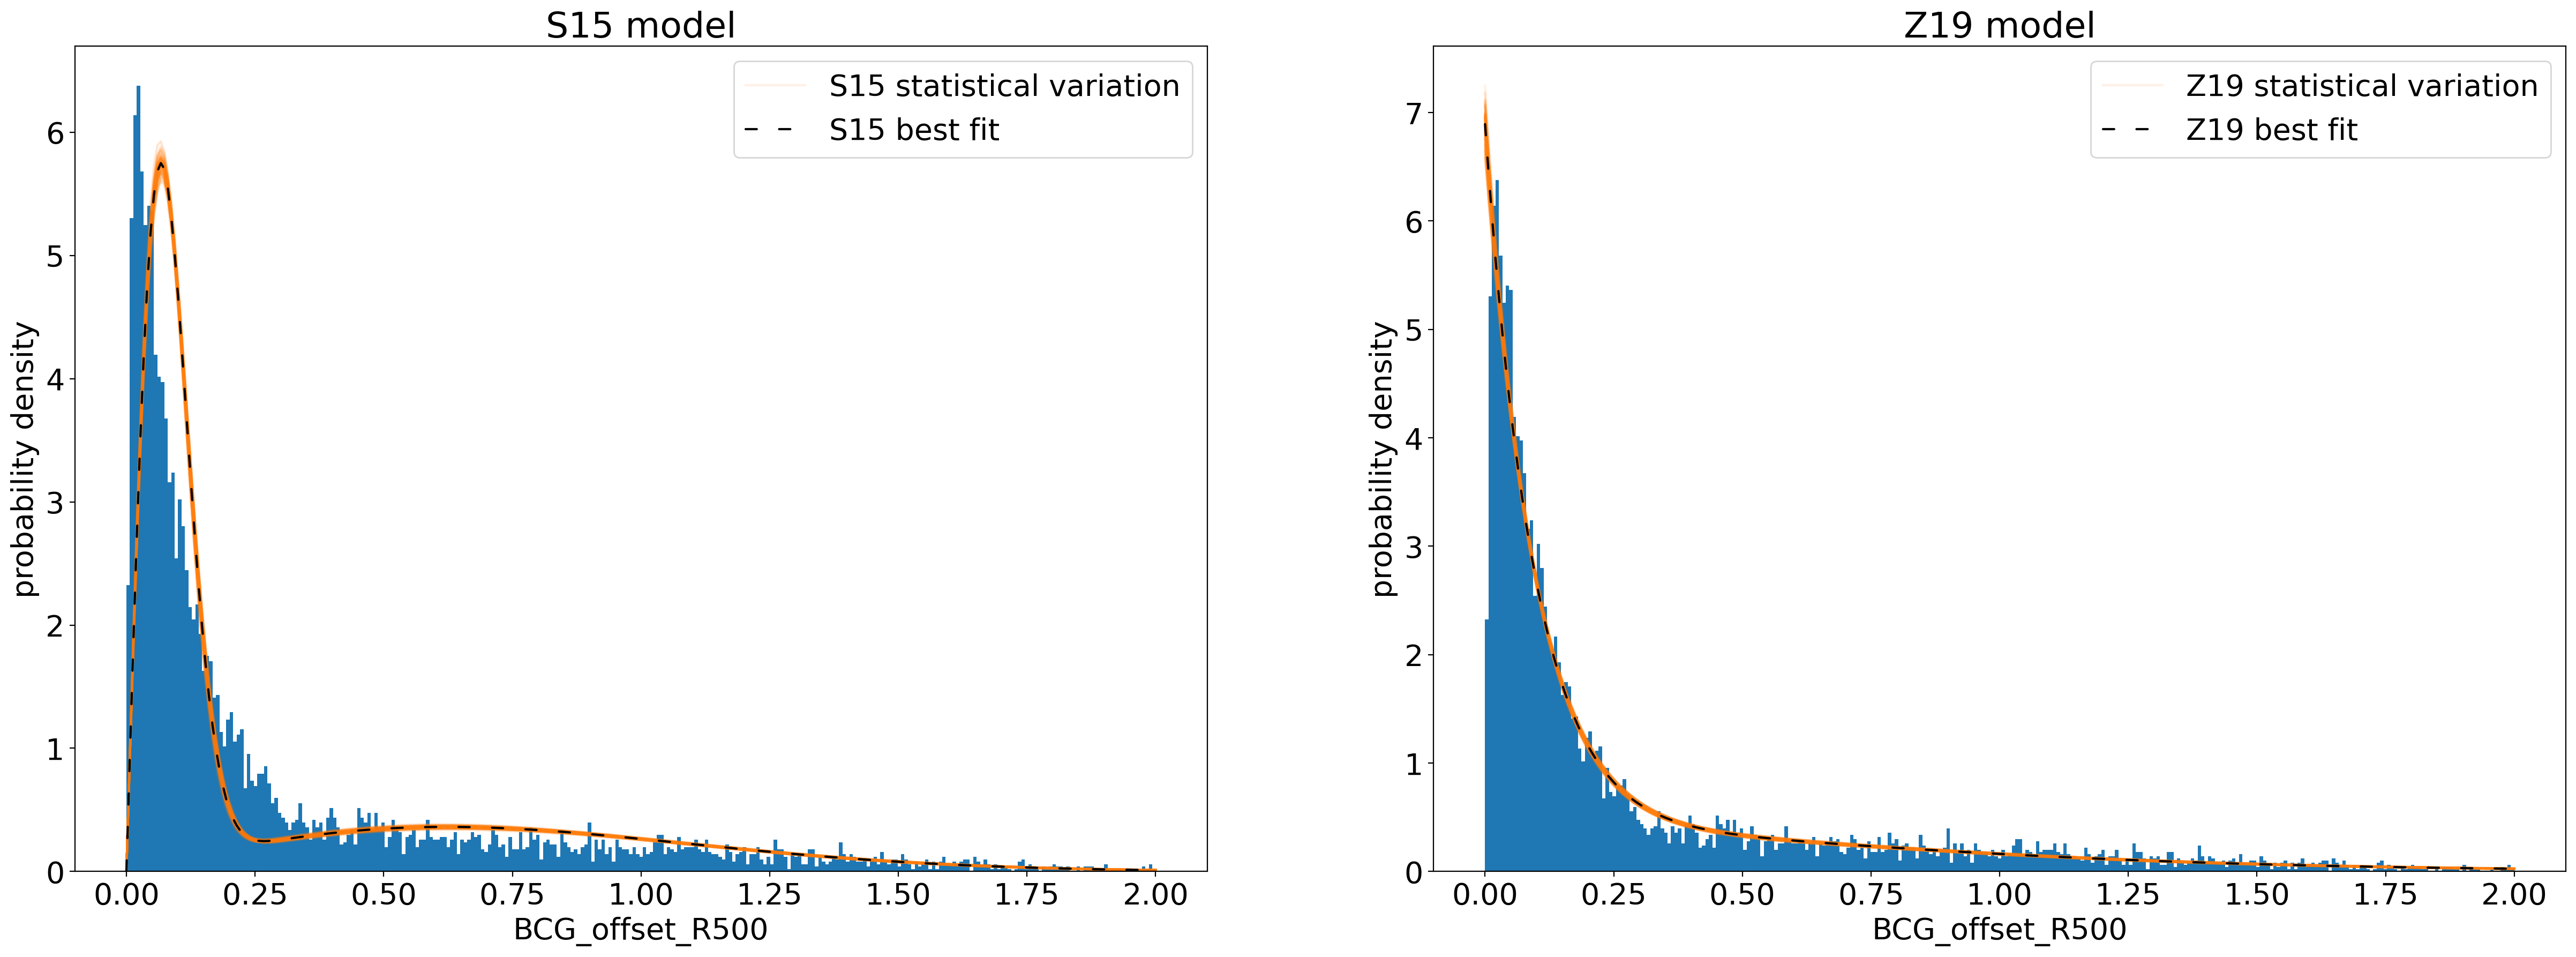

In [12]:
bins = np.linspace(0,2,300)
fig, ax = plt.subplots(1,2, figsize= (30,10))

# S15
for iax in ax:
    iax.hist(SCID['BCG_offset_R500'], bins, density=True)

# also print some samples from the emcee
idxs = np.random.randint(len(emcee_samples['S15']), size=100)

for i in idxs:
    sample = emcee_samples['S15'][i]
    ax[0].plot(bins, S15(bins, sample), 'C1', alpha=0.1)
ax[0].plot(bins, S15(bins, emcee_samples['S15'][0]), 'C1', alpha=0.1,  label = "S15 statistical variation")

ax[0].plot(bins, S15(bins, S15_best_theta[1,:]), "--", c='black', 
         dash_capstyle='round', dash_joinstyle='round', dashes=(5, 10), 
         label = "S15 best fit")

# Z19
# also print some samples from the emcee
idxs = np.random.randint(len(emcee_samples['Z19']), size=100)

for i in idxs:
    sample = emcee_samples['Z19'][i]
    ax[1].plot(bins, Z19(bins, sample), 'C1', alpha=0.1)
ax[1].plot(bins, Z19(bins, emcee_samples['Z19'][0]), 'C1', alpha=0.1,  label = "Z19 statistical variation")

ax[1].plot(bins, Z19(bins, Z19_best_theta[1,:]), "--", c='black', 
         dash_capstyle='round', dash_joinstyle='round', dashes=(5, 10), 
         label = "Z19 best fit")

# legend and labels
ax[0].set_title('S15 model')
ax[1].set_title('Z19 model')
for iax in ax:
    iax.set_xlabel('BCG_offset_R500')
    iax.set_ylabel('probability density')
    iax.legend()

## Capacità dei modello di riprodurre i dati
Per valutare la capacità dei modelli di riprodurre i dati è stato scelto di usare la [divergenza di Kullback-Leibler](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence), che è una distanza (non simmetrica) tra due distribuzioni. 
La sua formulazione matematica è:

$$
D_{\mathrm{KL}}(P \| Q)=\int_{-\infty}^{\infty} p(x) \log \left(\frac{p(x)}{q(x)}\right) \mathrm{d}x
$$

Dove $q(x)$ è la densità di probabilità fornita dal modello e $p(x)$ è quella stimata dal campione usando la distribuzione binomiale, con $dx$ l'ampiezza di un bin. Questa funzione è utile perché permette di rappresentare l'accordo tra due distribuzioni con un singolo numero, rendendo l'ananlisi e il confronto più oggettivi.

La prima idea è stata quella di generare un campione casuale dal modello, usando il metodo dell'accept-reject, ma questo non ha funzionato poiché nelle code poteva succedere di non avere nessun evento simulato ($q(x) = 0$), ma degli eventi nel campione di eRosita ($p(x) \neq 0$). Questo evidentemente non andava bene e causava problemi di convergenza, quindi si è deciso di prendere $q(x)$ direttamante dal modello, garantendo così di non avere mai valori nulli nelle code. 

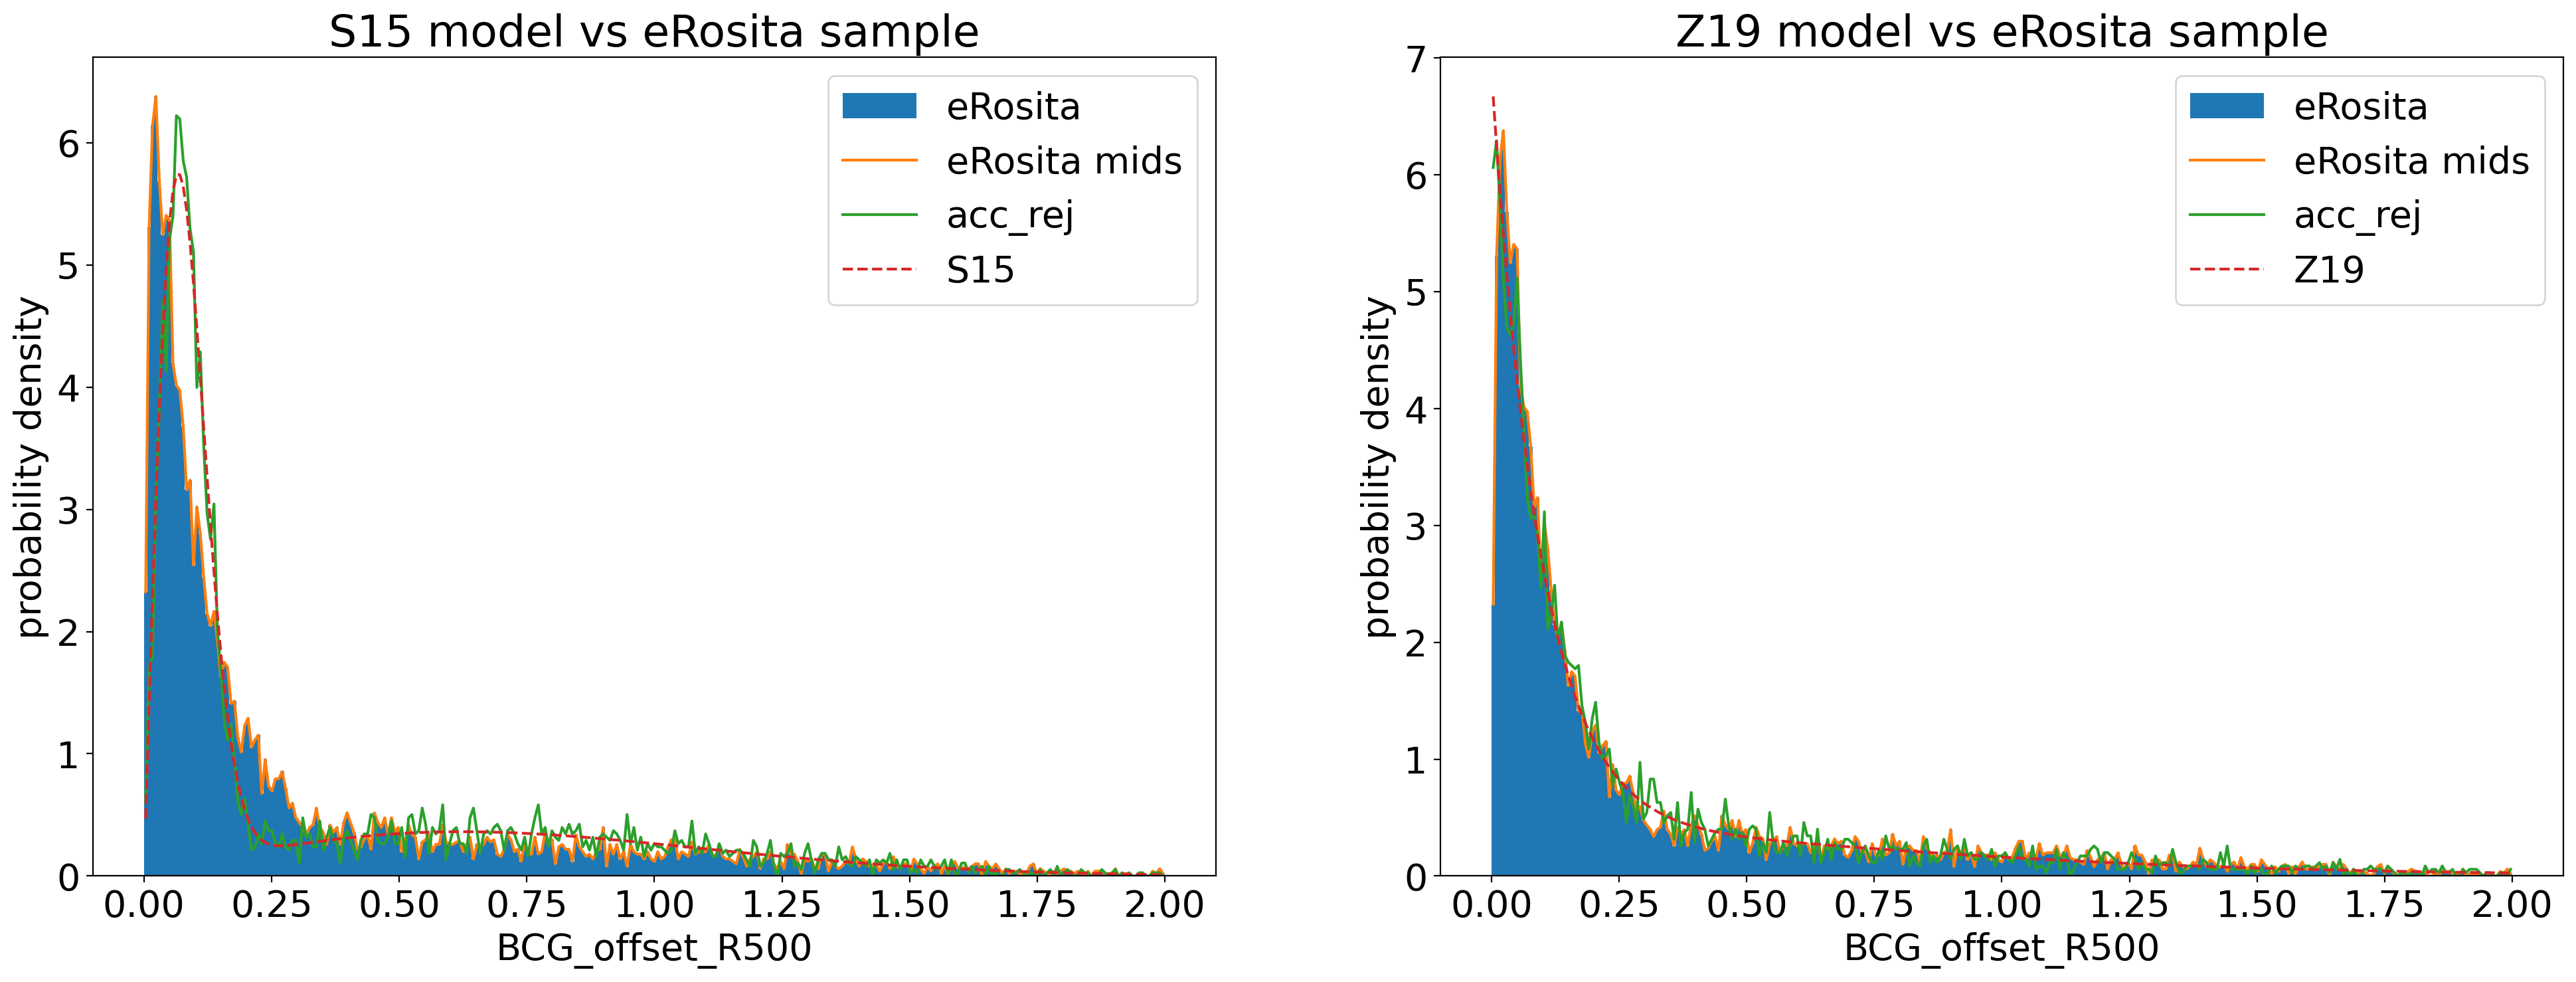

In [64]:
from scipy.special import kl_div, rel_entr

xmin = 0
xmax = 3
pmax = 6
N_MC = 100000

pars = xmin, xmax, pmax, N_MC

def acc_rej(model, theta, pars):
    xmin, xmax, pmax, N_MC = pars
    t = np.random.uniform(xmin,xmax,N_MC)  #get uniform temporary x values
    y = np.random.uniform(0,pmax,N_MC)  # get uniform random y values

    #make a mask that keeps index to the accepted pairs. Plot them
    mask = y<model(t,theta)
    return t[mask]


kl_bins = np.linspace(0,2,300)
mids = middle(kl_bins)
bin_len = kl_bins[1] - kl_bins[0]
fig, ax = plt.subplots(1,2, figsize=(24,8))

# eRosita
eRos_hist = np.histogram(SCID['BCG_offset_R500'], kl_bins, density=True)[0]

for iax in ax:
    iax.hist(SCID['BCG_offset_R500'], density=True, bins=kl_bins, label = "eRosita")
    iax.plot(mids, eRos_hist, label='eRosita mids')
# S15
sample = acc_rej(S15, S15_best_theta[1,:], pars)
S15_hist = np.histogram(sample, kl_bins, density=True)[0]
ax[0].plot(mids, S15_hist, label = "acc_rej")
ax[0].plot(mids, S15(mids, S15_best_theta[1, :]), '--', label = "S15")

# Z19
sample = acc_rej(Z19, Z19_best_theta[1,:], pars)
Z19_hist = np.histogram(sample, kl_bins, density=True)[0]
ax[1].plot(mids, Z19_hist, label = "acc_rej")
ax[1].plot(mids, Z19(mids, Z19_best_theta[1, :]), '--', label = "Z19")

for iax in ax:
    iax.set_xlabel("BCG_offset_R500")
    iax.set_ylabel("probability density")
    iax.legend()

ax[0].set_title('S15 model vs eRosita sample')
_ = ax[1].set_title('Z19 model vs eRosita sample')

Dai grafici *'S15 model vs eRosita sample'* e *'Z19 model vs eRosita sample'* si vede che i modelli riproducono entrambi la distribuzione del miscentering, e sembrerebbe che il modello $Z19$ sia il più fedele nella loro riproduzione.

Qui sotto, invece, si vede che non è stato possibile usare l'accept-reject come distribuzione proposta dal modello poiché c'erano problemi di convergenza nelle code. Sono poi riportati i valori della divergenza per i due modelli.

In [14]:
# S15
acc_rej_kl = kl_div(eRos_hist, S15_hist).sum()
S15_best_kl = np.zeros(3)
S15_best_kl[1] = kl_div(eRos_hist, S15(mids, S15_best_theta[1,:])).sum() * bin_len

print("Kullback-Leibler divergence for S15 model: {:.4f}".format(S15_best_kl[1]))
print(f"Kullback-Leibler divergence for S15 acc-rej: {acc_rej_kl}")

# Z19
acc_rej_kl = kl_div(eRos_hist, Z19_hist).sum()
Z19_best_kl = np.zeros(3)
Z19_best_kl[1] = kl_div(eRos_hist, Z19(mids, Z19_best_theta[1,:])).sum() * bin_len

print("Kullback-Leibler divergence for Z19 model: {:.4f}".format(Z19_best_kl[1]))
print(f"Kullback-Leibler divergence for Z19 acc-rej: {acc_rej_kl}")

Kullback-Leibler divergence for S15 model: 0.1554
Kullback-Leibler divergence for S15 acc-rej: inf
Kullback-Leibler divergence for Z19 model: 0.0392
Kullback-Leibler divergence for Z19 acc-rej: inf


Quindi il modello $Z19$ è in accordo con i dati di un ordine di grandezza in più rispetto a $S15$, per quanto riguarda la divergenza di K.L.

L'ultimo proposito di questa relazione è associare ai valori della divergenza un'incertezza, in modo da quantificarne l'errore. Il procedimento è analogo a quello che è stato svolto in precedenza: si genera un campione statistico e se ne prendono i percentili.
Applicando la divergenza di Kullback-Leibler su tutti i modelli per i $\theta$ provenienti dall'emcee si ottiene la statistica dell'accordo medio tra i modelli, con i parametri stimati dal posterior, e i dati sperimentali.

S15 Kullback-Liebler with uncertainty: [0.00071769 0.15535731 0.00085063]
Z19 Kullback-Liebler with uncertainty: [0.0003616  0.03919779 0.00042153]


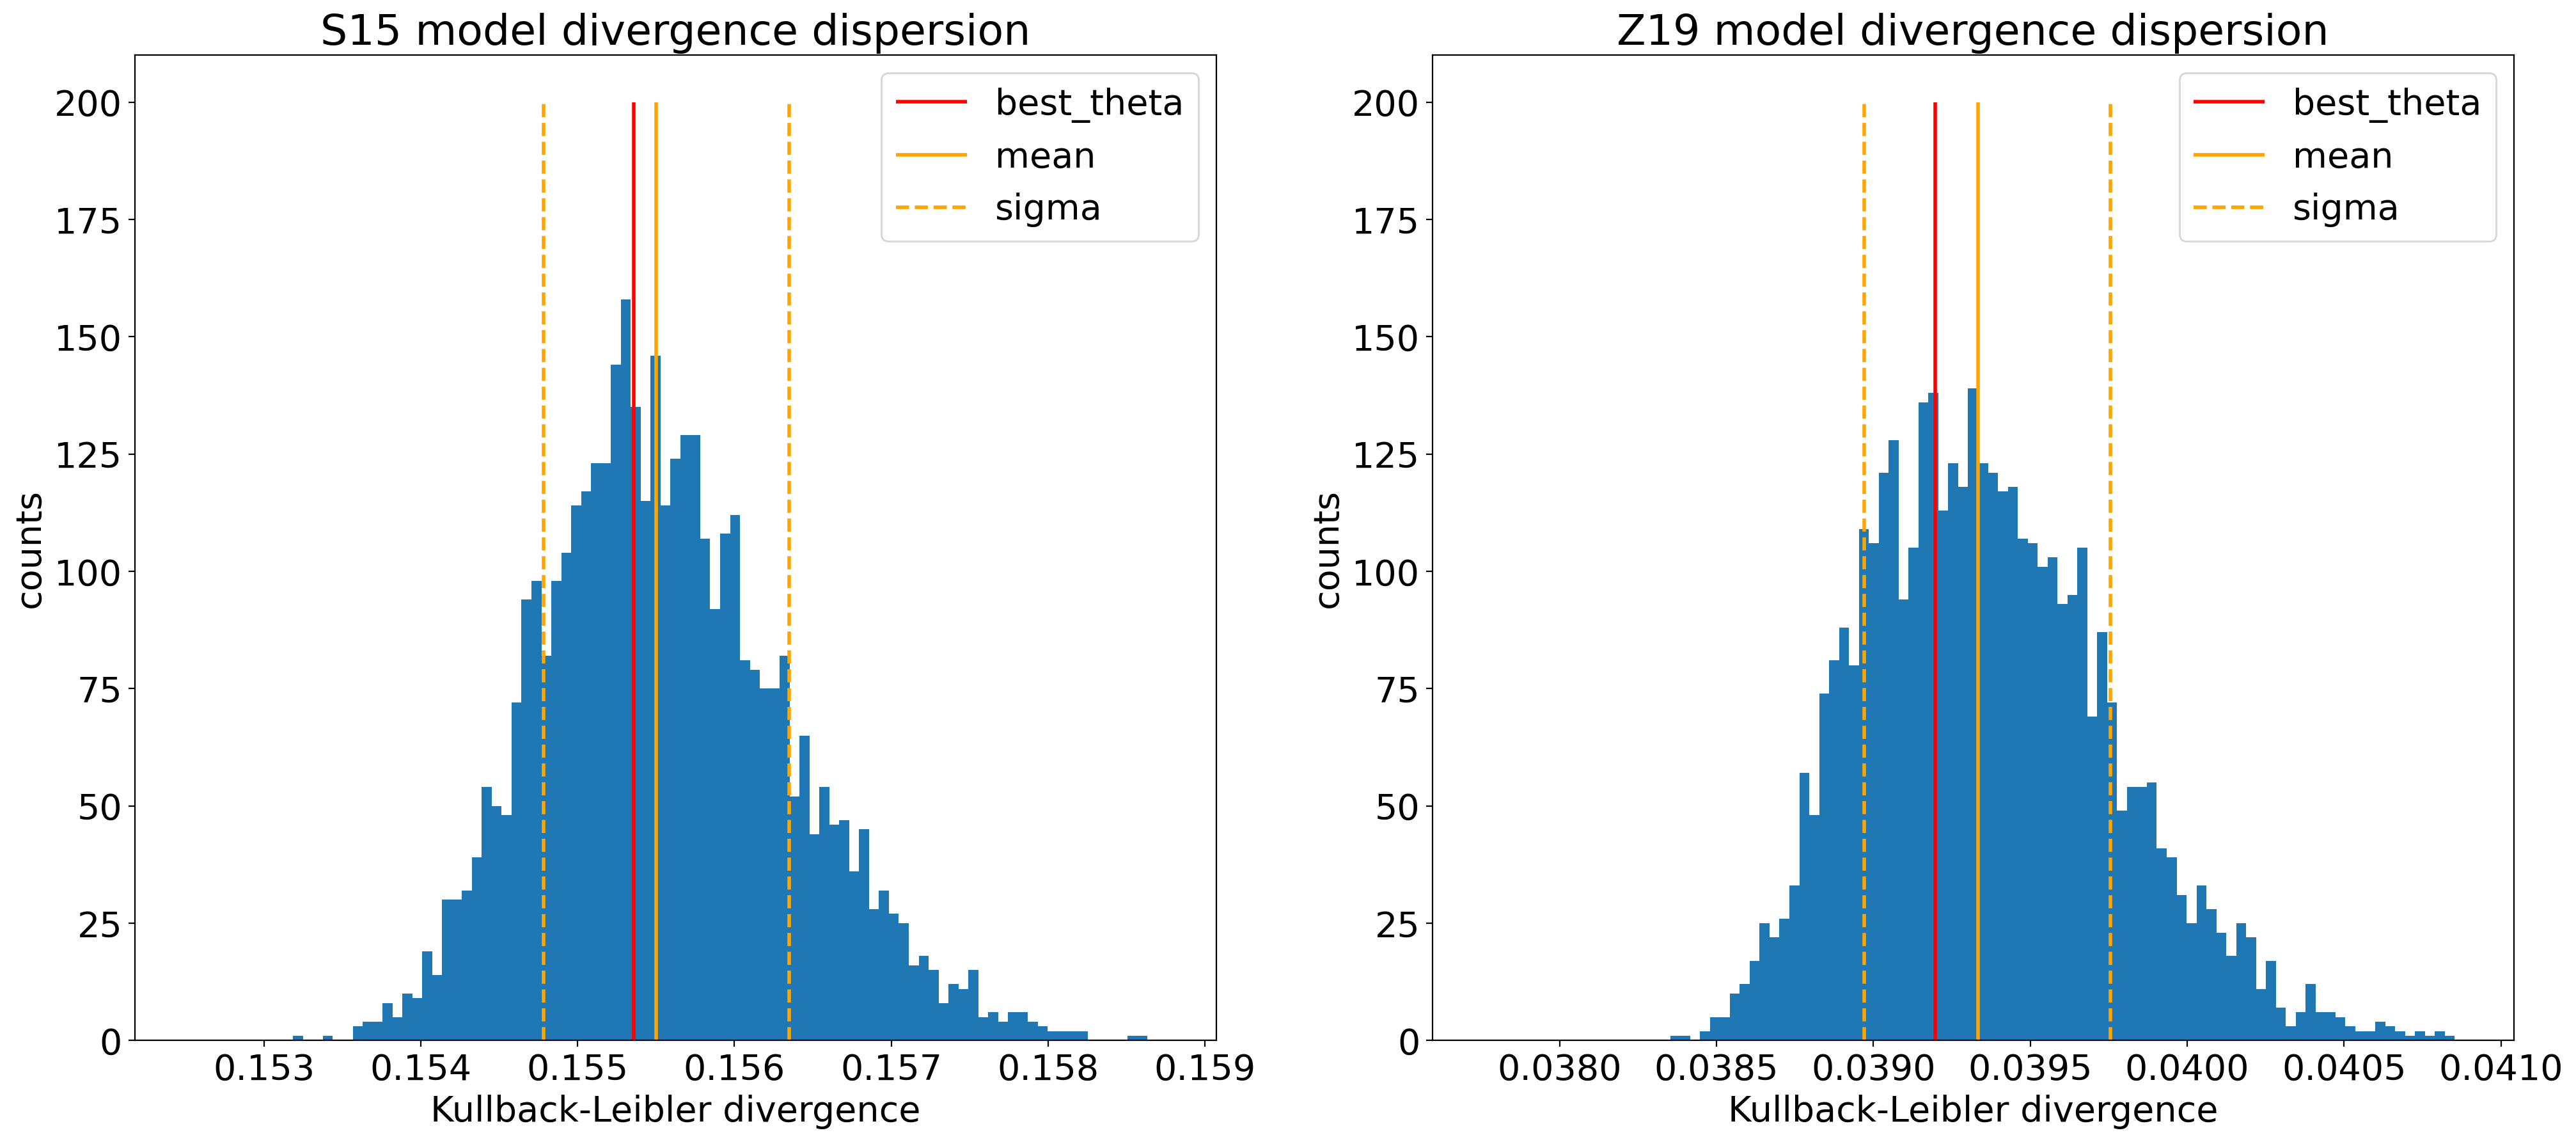

In [67]:
# S15
S15_kl_sample = []
for theta in emcee_samples['S15']:
    res = kl_div(eRos_hist, S15(mids, theta)).sum() * bin_len
    S15_kl_sample.append(res)

S15_kl_mean = np.percentile(S15_kl_sample, 50)
S15_best_kl[0] = S15_kl_mean - np.percentile(S15_kl_sample, 16)
S15_best_kl[2] = np.percentile(S15_kl_sample, 84) - S15_kl_mean
S15_bins = np.linspace(   S15_best_kl[1] - 4 * S15_best_kl[0],
                                S15_best_kl[1] + 4 * S15_best_kl[2], 
                                100)
print(f"S15 Kullback-Liebler with uncertainty: {S15_best_kl}")

# Z19
Z19_kl_sample = []
for theta in emcee_samples['Z19']:
    res = kl_div(eRos_hist, Z19(mids, theta)).sum() * bin_len
    Z19_kl_sample.append(res)

Z19_kl_mean = np.percentile(Z19_kl_sample, 50)
Z19_best_kl[0] = Z19_kl_mean - np.percentile(Z19_kl_sample, 16)
Z19_best_kl[2] = np.percentile(Z19_kl_sample, 84) - Z19_kl_mean
Z19_bins = np.linspace(   Z19_best_kl[1] - 4 * Z19_best_kl[0],
                                Z19_best_kl[1] + 4 * Z19_best_kl[2], 
                                100)
print(f"Z19 Kullback-Liebler with uncertainty: {Z19_best_kl}")
# bins = np.linspace(0.0379, 0.0401, 80)

fig, ax = plt.subplots(1,2 , figsize=(24,10))

# S15
ax[0].hist(S15_kl_sample, S15_bins)
ax[0].vlines(S15_best_kl[1], 0, 200,color='r', linestyle='-', lw=2, label="best_theta")
ax[0].vlines(S15_kl_mean, 0, 200,color='orange', linestyle='-', lw=2, label="mean")
ax[0].vlines(S15_kl_mean - S15_best_kl[0], 0, 200,color='orange', linestyle='--', lw=2, label="sigma")
ax[0].vlines(S15_kl_mean + S15_best_kl[2], 0, 200,color='orange', linestyle='--', lw=2)

# Z19
ax[1].hist(Z19_kl_sample, Z19_bins)
ax[1].vlines(Z19_best_kl[1], 0, 200,color='r', linestyle='-', lw=2, label="best_theta")
ax[1].vlines(Z19_kl_mean, 0, 200,color='orange', linestyle='-', lw=2, label="mean")
ax[1].vlines(Z19_kl_mean - Z19_best_kl[0], 0, 200,color='orange', linestyle='--', lw=2, label="sigma")
ax[1].vlines(Z19_kl_mean + Z19_best_kl[2], 0, 200,color='orange', linestyle='--', lw=2)


for iax in ax:
    iax.set_xlabel("Kullback-Leibler divergence")
    iax.set_ylabel("counts")
    iax.legend()

ax[0].set_title('S15 model divergence dispersion')
_ = ax[1].set_title('Z19 model divergence dispersion')

Dall'analisi della statistica sulla divergenza risulta che il modello $Z19$ non solo ha un accordo con i dati migliore, ma ha anche una dispersione intorno al valore medio (rispetto alla statistica di K.L.) che è circa la metà di quella di $S15$. 
Come incertezze sui valori di accordo sono state prese le differenze tra il 50 e tra il 16 percentile e il 50 e l'84 esimo percentile, ma *non si è usato il 50 perc. come stima migliore*. Questo perché tutto quello che si voleva fare era associare alle stime un errore e, visto che il valore stimato è vicino alla media in entrambi i casi, risulta ragionevole assumere che le incertezze sui valori stimati e sulla media siano simili.

Dai grafici si osserva anche che:
- Il valore di $\theta$ che descrive il modello migliore *non* è quello per cui è minima la divergenza di K.L., come uno invece si aspetterebbe. Questo potrebbe essere spiegato dal fatto che ci sono delle incertezze statistiche sul campione misurato che, per casualità, rendano valori di $\theta$ diversi da quello ottimale più in accordo con questo *specifico* campione.
- La distribuzione delle divergenze sembrerebbe essere gaussiana e il motivo dovrebbe essere il teorema del limite centrale in quanto la divergenza è stata calcolata come somma di variabili casuali indipendenti con medesima distribuzione di probabilità.

## Confronto tra i due modelli e conclusioni
Il grafico *'Kullback-Leibler divergence comparison'* mette a confronto l'accordo tra i modelli e i dati. Si possono notare le cose già dette in precedenza: il modello $Z19$ è in maggiore accordo con i dati ed ha una dispersione minore, è dunque anche più preciso nel senso che rimane coerente con i dati più a lungo di quanto lo faccia $S15$ al variare dei parametri $\theta$.

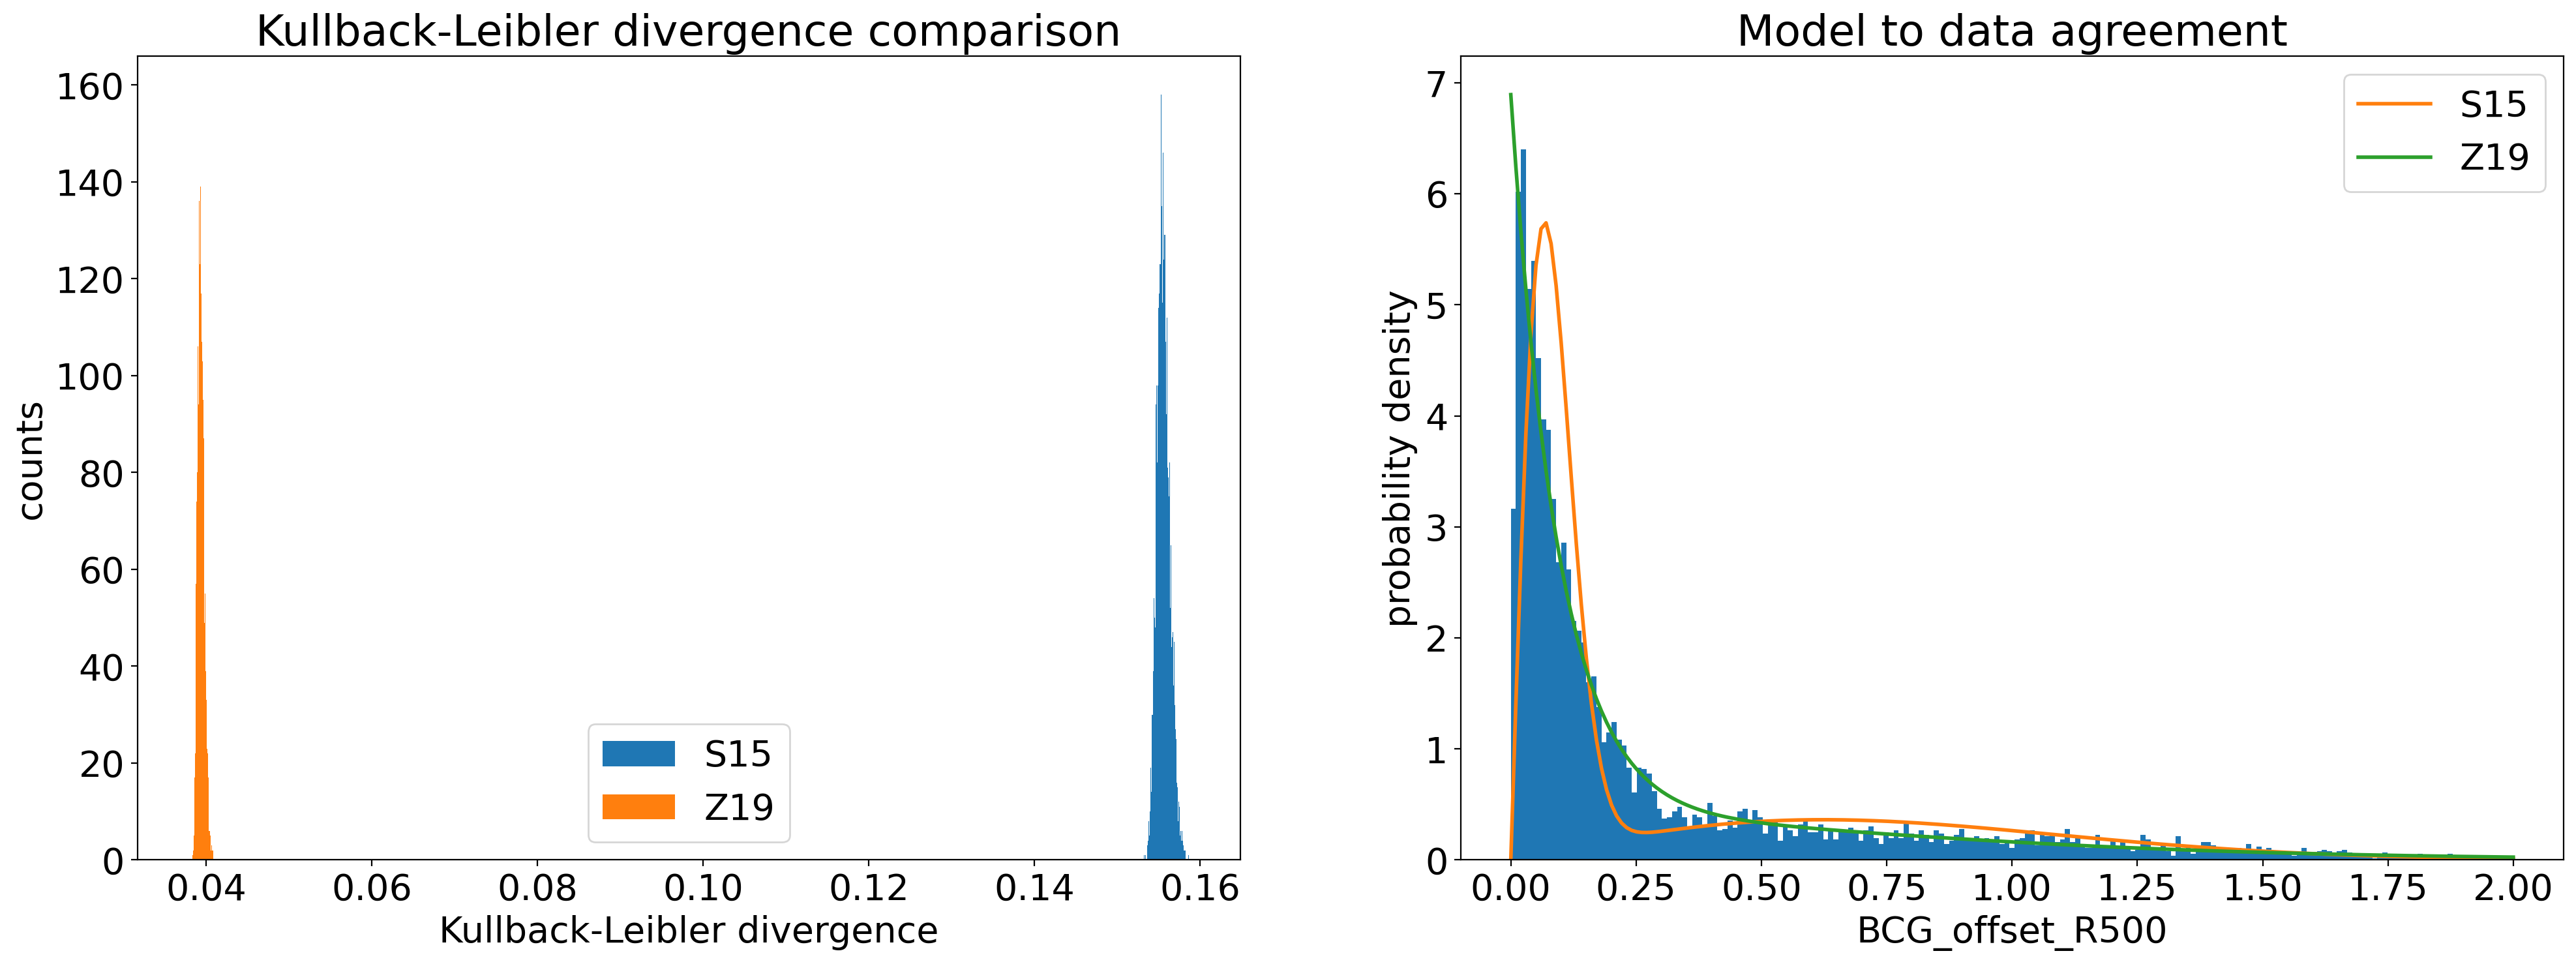

In [58]:
fig,ax = plt.subplots(1,2, figsize= (24,8))
            
ax[0].hist(S15_kl_sample, S15_bins, label = 'S15')
ax[0].hist(Z19_kl_sample, Z19_bins, label = 'Z19')
ax[0].set_xlabel('Kullback-Leibler divergence')
ax[0].set_ylabel('counts')
ax[0].legend()

bins = np.linspace(0,2,200)
ax[1].hist(SCID['BCG_offset_R500'], bins, density= True)
ax[1].plot(bins, S15(bins, S15_best_theta[1,:]), label='S15', linewidth=2)
ax[1].plot(bins, Z19(bins, Z19_best_theta[1,:]), label='Z19', linewidth=2)
ax[1].set_xlabel('BCG_offset_R500')
ax[1].set_ylabel('probability density')
ax[1].legend()

ax[0].set_title('Kullback-Leibler divergence comparison')
_ = ax[1].set_title('Model to data agreement')

Per completezza sono stati elencati e riassunti tutti i parametri stimati con le relative incertezze.

In [65]:
labels = ["\\rho", "\sigma_0", "\sigma_1"]

for i, label in enumerate(labels):
    txt = "S15\; parameters:\quad \mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(S15_best_theta[1, i], S15_best_theta[0,i], S15_best_theta[2,i], label)
    display(Math(txt))

for i, label in enumerate(labels):
    txt = "Z19\; parameters:\quad \mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(Z19_best_theta[1, i], Z19_best_theta[0,i], Z19_best_theta[2,i], label)
    display(Math(txt))
    
# print the results
txt = "\mathrm{{{3}}} = {0:.4f}_{{-{1:.4f}}}^{{{2:.4f}}}"
txt = txt.format(S15_best_kl[1], S15_best_kl[0], S15_best_kl[2], "S15_{Kullback-Leibler}")
display(Math(txt))

txt = "\mathrm{{{3}}} = {0:.4f}_{{-{1:.4f}}}^{{{2:.4f}}}"
txt = txt.format(Z19_best_kl[1], Z19_best_kl[0], Z19_best_kl[2], "Z19_{Kullback-Leibler}")
display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Proposte di miglioramento
Per migliorare l'analisi dei dati e l'accuratezza dei risultati sono elencate le seguenti proposte:
- **Aumentare il campione dati, sperimentali e mc**.
 Sebbene potrebbe apparire banale come proposta sicuramente è il modo più semplice ed efficace per aumentare la precisione dei risultati. Nei prossimi anni saranno raccolti più dati sperimentali e le analisi saranno dunque più accurate, nel frattempo si potrebbe aumentare il campione di dati sintetici generato da emcee.
- **Analizzare la dipendenza da massa e redshift nelle code**. Come detto all'inizio di questa analisi non sembrerebbe esserci correlazione tra queste variabili, almeno nella regione in cui si concentrano i dati, ma nelle code si. A questo punto sarebbe interessante provare a descrivere l'andamento delle code aggiungendo dei parametri ai modelli $S15$ e $Z19$ che tengano in considerazione anche queste nuove dipendenze.
- **Considerare altre metriche per valutare l'accordo del modello con i dati**. La scelta della distanza di Kullback-Leibler è stata totlamente arbitratia, anche altre metriche sarebbero andate bene. Risulterebbe interessante vedere l'accordo dei modelli col campione usando altre statistiche e valutandone le relative distribuzioni sul campione montecarlo (saranno ancora gaussiane?).
- **Fare un analisi sull'ampiezza dei bin**. La scelta dell'ampiezza dei bin è una delle decisioni più importanti quando si fanno istogrammi e può influenzare molto i risultati, sopratutto quando si vogliono calcolare le aree dei grafici. In questo caso specifico ho visto che l'accordo tra il campione sperimentale e i modelli, fatta tramite la divergenza di K.L., dipende dall'ampiezza dei bin scelti. Questa dipendenza andrebbe investigata al fine di migliorare la qualità dei risultati.